In [5]:
%%capture
import pandas as pd
import numpy as np
import scipy
import pywt
import tensorflow as tf
import tensorflow_addons as tfa
from tensorflow import keras
from tensorflow.keras import layers
import IPython
import IPython.display
from datetime import datetime 
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import scipy
import math
import warnings
warnings.filterwarnings('ignore')
plt.style.use('seaborn-v0_8-darkgrid')
plt.rc('xtick', labelsize=15)
plt.rc('ytick', labelsize=15) 
pd.set_option('display.max_columns', None)

In [9]:
%cd C:/Users/choco/OneDrive/DARIO Computador/UnB/Disciplinas/Fundamentos de sistemas eólicos/Furnas AP
#%cd D:/Users/Dario/OneDrive/DARIO Computador/UnB/Disciplinas/Fundamentos de sistemas eólicos/Furnas AP

C:\Users\choco\OneDrive\DARIO Computador\UnB\Disciplinas\Fundamentos de sistemas eólicos\Furnas AP


In [10]:
#Colocar o arquivo do Nasa Power com média horária na mesma pasta que o script
ap_data = pd.read_csv('./POWER_Point_Hourly_20010101_20220331.csv', sep=',', header=10)

In [11]:
#Converte columnas YY-MO-DY ao formato datetime
ap_data.columns = ["Year", "Month", "Day", "Hour", "Wind Direction", "Wind Speed"]
#ap_data.head(5)

In [12]:
ap_data['Date'] = pd.to_datetime(ap_data[['Year','Month', 'Day', 'Hour']])
ap_data.set_index('Date', inplace=True) # inplace implementa o set index
ap_data['DoY'] = ap_data.index.dayofyear
ap_data.reset_index(inplace=True)
ap_data.insert(0, 'HoY', (ap_data.DoY-1)*24 + ap_data.Hour)
ap_data.set_index(['DoY', 'HoY', 'Date'], inplace=True)
#ap_data.head(10)

In [13]:
ws_meanxhora = ap_data['Wind Speed'].groupby([ap_data.Year, ap_data.Month, ap_data.Day, ap_data.Hour]).mean().to_frame()
#ws_meanxhora = ws_meanxhora[:-640]
#ws_meanxhora

In [14]:
tt=list(ws_meanxhora["Wind Speed"])
wavelet = pywt.Wavelet('db2')
vect_coeffs=[]
input_step_time = 128
pywt.swt_max_level(len(tt[0:input_step_time]))

7

In [15]:
wavelet

pywt._extensions._pywt.Wavelet(name='db2', filter_bank=([-0.12940952255126037, 0.2241438680420134, 0.8365163037378079, 0.48296291314453416], [-0.48296291314453416, 0.8365163037378079, -0.2241438680420134, -0.12940952255126037], [0.48296291314453416, 0.8365163037378079, 0.2241438680420134, -0.12940952255126037], [-0.12940952255126037, -0.2241438680420134, 0.8365163037378079, -0.48296291314453416]))

In [16]:
l=len(tt)
total_samples = l/input_step_time
total_samples

1455.0

In [9]:
del vect_coeffs

In [17]:
for i in range(l-input_step_time):
    coeffs = pywt.swt(tt[i:i+input_step_time], wavelet, level=4, trim_approx=True, norm=True)
    coeffs = list(coeffs)
    vect_coeffs.append(coeffs)

In [18]:
coeffs

[array([2.51829033, 2.36834515, 2.22656887, 2.12017117, 2.05396297,
        2.03637167, 2.10130849, 2.2402491 , 2.43776886, 2.66787435,
        2.90630388, 3.13908815, 3.34859946, 3.51644778, 3.65277022,
        3.75147063, 3.80400026, 3.83812452, 3.85663337, 3.85021902,
        3.83045496, 3.79998519, 3.72596987, 3.59742658, 3.42343933,
        3.22439623, 3.0254983 , 2.84721439, 2.69713275, 2.57691587,
        2.49265234, 2.46200626, 2.49690633, 2.58391054, 2.69902934,
        2.82827915, 2.94375905, 3.0311559 , 3.11513586, 3.21306128,
        3.3219162 , 3.43043799, 3.52796543, 3.60723002, 3.69792725,
        3.81585977, 3.92732646, 3.99174479, 3.99692111, 3.96143316,
        3.91942198, 3.89046974, 3.87242648, 3.88587899, 3.94790872,
        4.06088589, 4.22597142, 4.43514732, 4.6719368 , 4.91472831,
        5.11790907, 5.26741149, 5.39378184, 5.52694394, 5.66674354,
        5.80299907, 5.9133434 , 5.99083198, 6.06961033, 6.12514852,
        6.1197476 , 6.04187031, 5.89756504, 5.70

In [27]:
len(vect_coeffs)

186112

In [28]:
len(tt)

186240

In [19]:
d=[i for i in range(len(tt))]

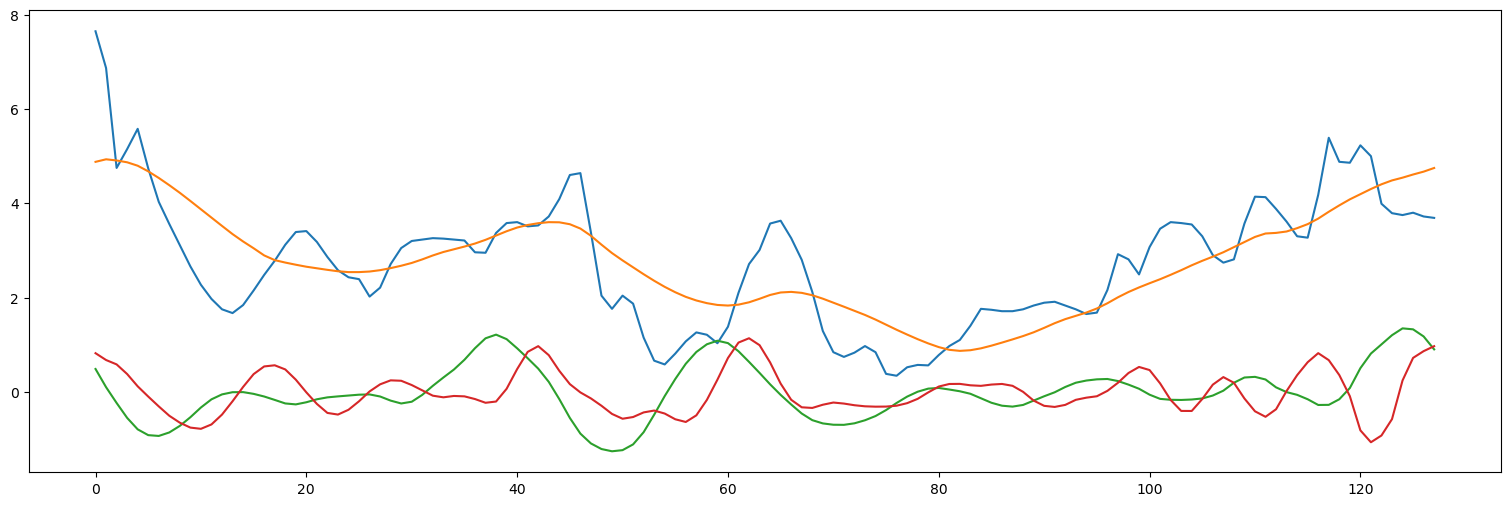

In [20]:
plt.style.use('default')
plt.figure(figsize=(19,6))
plt.plot(d[0:128],          tt[128:256]) 
plt.plot(d[0:128], vect_coeffs[128][0])
plt.plot(d[0:128], vect_coeffs[128][1])
plt.plot(d[0:128], vect_coeffs[128][2])
#plt.plot(d[0:128], vect_coeffs[128][3])
#plt.plot(d[0:128], vect_coeffs[128][4])

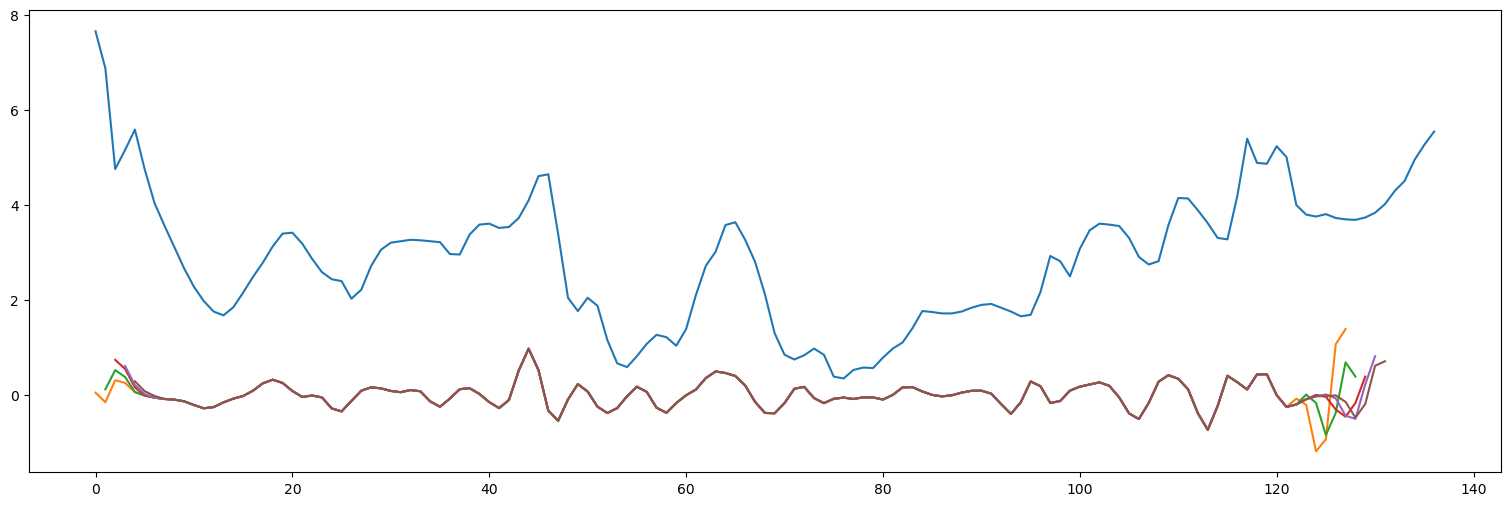

In [21]:
plt.style.use('default')
plt.figure(figsize=(19,6))
plt.plot(d[0:137],          tt[128:265]) 
plt.plot(d[0:128], vect_coeffs[128][3])
plt.plot(d[1:129], vect_coeffs[129][3])
plt.plot(d[2:130], vect_coeffs[130][3])
plt.plot(d[3:131], vect_coeffs[131][3])
plt.plot(d[4:132], vect_coeffs[132][3])
#plt.plot(d[0:128], vect_coeffs[0][5])
#plt.plot(d[0:32], coeffs[6][0:32])
#plt.plot(d[0:32], coeffs[7][0:32])
#plt.plot(d[0:32], coeffs[8][0:32])

In [33]:
vect_coeffs[0][0]

array([5.23212053, 4.90541503, 4.60192582, 4.33062765, 4.11532331,
       3.95035432, 3.82391041, 3.72111319, 3.6352027 , 3.58422523,
       3.57814485, 3.62707783, 3.72347899, 3.86816908, 4.04384511,
       4.26711163, 4.55905502, 4.83994919, 5.0973332 , 5.31895063,
       5.49959645, 5.6555913 , 5.79108211, 5.90387588, 5.99822589,
       6.08065109, 6.14333426, 6.17888822, 6.19266199, 6.1940244 ,
       6.18825965, 6.19223891, 6.21134041, 6.24122672, 6.30386916,
       6.38082988, 6.4470398 , 6.50045485, 6.5419151 , 6.57902927,
       6.60431668, 6.60821513, 6.60123909, 6.58038899, 6.54060471,
       6.49982591, 6.46237625, 6.41005189, 6.33814584, 6.2454598 ,
       6.11406579, 5.98994551, 5.89553523, 5.79600193, 5.69212858,
       5.5868267 , 5.48941017, 5.40762761, 5.33521523, 5.27832463,
       5.24793987, 5.23673638, 5.21473019, 5.16393148, 5.07918159,
       4.98052258, 4.88581312, 4.75782774, 4.61198526, 4.48970142,
       4.38875404, 4.29905704, 4.2149439 , 4.13545146, 4.05456

In [37]:
vect_coeffs[1][0]

array([5.37445266, 5.04848369, 4.75317239, 4.51232153, 4.32752867,
       4.17972752, 4.06129571, 3.96547329, 3.88322664, 3.84434371,
       3.86619679, 3.94124071, 4.0432163 , 4.1819005 , 4.34681795,
       4.55905502, 4.83994919, 5.0973332 , 5.31895063, 5.49959645,
       5.6555913 , 5.79108211, 5.90387588, 5.99822589, 6.08065109,
       6.14333426, 6.17888822, 6.19266199, 6.1940244 , 6.18825965,
       6.19223891, 6.21134041, 6.24122672, 6.30386916, 6.38082988,
       6.4470398 , 6.50045485, 6.5419151 , 6.57902927, 6.60431668,
       6.60821513, 6.60123909, 6.58038899, 6.54060471, 6.49982591,
       6.46237625, 6.41005189, 6.33814584, 6.2454598 , 6.11406579,
       5.98994551, 5.89553523, 5.79600193, 5.69212858, 5.5868267 ,
       5.48941017, 5.40762761, 5.33521523, 5.27832463, 5.24793987,
       5.23673638, 5.21473019, 5.16393148, 5.07918159, 4.98052258,
       4.88581312, 4.75782774, 4.61198526, 4.48970142, 4.38875404,
       4.29905704, 4.2149439 , 4.13545146, 4.0545608 , 3.95905

In [22]:
vect_coeffs = np.array(vect_coeffs) 
vect_coeffs.shape

(186112, 5, 128)

In [37]:
type(vect_coeffs)

numpy.ndarray

In [23]:
vect_coeffs_reshape = vect_coeffs.transpose((0,2,1)) #Para fazer a transposição das matrizes na dimensão 0 (como quando você está transpondo
vect_coeffs_reshape.shape                            #  matrizesonde 0 é a dimensão do lote), você deve definir axes (0,2,1]).

(186112, 128, 5)

In [24]:
target_y = np.array(tt[128:])
target_y = target_y.reshape((len(target_y),1,1))
target_y.shape

(186112, 1, 1)

In [25]:
split = int(len(vect_coeffs_reshape)*0.7)

train_x = vect_coeffs_reshape[0:split]
teste_x = vect_coeffs_reshape[split:]
train_y = target_y[0:split]
teste_y = target_y[split:]

In [26]:
AAA = [tt[i:i+128] for i in range(split)]

In [27]:
BBB = [tt[i:i+128] for i in range(split,l-128)]

In [28]:
AAA = np.array(AAA).reshape((split, input_step_time, 1))
BBB = np.array(BBB).reshape((len(teste_x), input_step_time, 1))
BBB.shape

(55834, 128, 1)

In [31]:
BBB[0,:,0]-tt[split : split+128] #verifica se ficaram certas as posição

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0.])

In [45]:
AAA[0,:,0]-tt[0:128] #verifica se ficaram certas as posição

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0.])

In [29]:
train_x_with_original = np.concatenate((train_x, AAA), axis=2)
teste_x_with_original = np.concatenate((teste_x, BBB), axis=2)
teste_x_with_original.shape

(55834, 128, 6)

In [30]:
train_x_with_original[0,:,5]

array([1.79, 1.64, 1.3 , 0.82, 1.25, 2.2 , 3.02, 3.41, 3.77, 3.76, 3.66,
       4.12, 4.77, 5.47, 5.89, 6.14, 6.31, 6.51, 6.69, 6.6 , 6.1 , 6.25,
       6.47, 6.39, 6.32, 6.17, 6.14, 6.08, 5.78, 5.83, 5.97, 6.19, 6.53,
       6.04, 6.11, 6.7 , 6.99, 6.96, 6.84, 6.77, 6.68, 6.46, 6.21, 5.99,
       5.8 , 6.31, 6.92, 7.  , 6.91, 6.56, 4.9 , 4.24, 5.3 , 5.21, 4.86,
       4.32, 4.02, 4.32, 4.56, 4.46, 4.71, 5.38, 6.06, 6.17, 5.86, 5.45,
       5.03, 4.5 , 3.97, 3.39, 2.93, 2.81, 3.03, 3.19, 3.25, 3.68, 4.09,
       2.88, 2.13, 2.86, 4.01, 4.56, 3.64, 4.62, 5.04, 4.45, 3.68, 3.16,
       2.91, 2.81, 2.88, 3.09, 3.62, 4.25, 5.27, 6.13, 6.66, 6.84, 6.73,
       6.51, 6.41, 6.43, 6.45, 6.58, 6.87, 6.46, 6.14, 7.49, 7.16, 6.2 ,
       5.49, 5.06, 4.75, 4.52, 4.38, 4.47, 4.85, 5.22, 5.91, 6.54, 6.95,
       7.09, 7.07, 7.14, 7.28, 7.45, 7.57, 7.62])

In [32]:
teste_x.shape

(55834, 128, 5)

In [33]:
split

130278

In [20]:
MAX_EPOCHS = 100

def compile_and_fit(model, train_x, train_y, patience=10):
    early_stopping = tf.keras.callbacks.EarlyStopping(monitor='mape',
                                                      patience=patience,
                                                      mode='auto')

    model.compile(loss=tf.losses.MeanSquaredError(),
                  optimizer=tf.optimizers.Adam(),
                  metrics=['mae', 'mape', 'mse', tfa.metrics.r_square.RSquare()])

    history = model.fit(train_x, train_y, epochs=MAX_EPOCHS, batch_size=256,
                        #validation_data=window.val,
                        callbacks=[early_stopping])
    return history

In [64]:
OUT_STEPS = 1
model = tf.keras.Sequential([
        # Shape [batch, time, features] => [batch, lstm_units].
        # Adding more `lstm_units` just overfits more quickly.
        tf.keras.layers.GRU(128, return_sequences=False),
        # Shape => [batch, out_steps*features].
        tf.keras.layers.Dense(OUT_STEPS,
                          kernel_initializer=tf.initializers.zeros()),
        # Shape => [batch, out_steps, features].
        tf.keras.layers.Reshape([OUT_STEPS, 1])
        ])

In [65]:
keras.utils.plot_model(model, "model.png", show_shapes=True, dpi=80)

ValueError: This model has not yet been built. Build the model first by calling `build()` or by calling the model on a batch of data.

In [132]:
train_x.shape

(130278, 128, 5)

In [133]:
train_y.shape

(130278, 1, 1)

In [127]:
train_yy = np.ones((130278, 1, 5))

train_yy.shape

(130278, 1, 5)

In [150]:
history = compile_and_fit(model, train_x, train_y)

Epoch 1/100
509/509 [==============================] - 343s 644ms/step - loss: 2.6982 - mae: 1.0847 - mape: 39.0823 - mse: 2.6982 - r_square: 0.4422
Epoch 2/100
509/509 [==============================] - 312s 613ms/step - loss: 0.1966 - mae: 0.2980 - mape: 9.9672 - mse: 0.1966 - r_square: 0.9594
Epoch 3/100
509/509 [==============================] - 359s 705ms/step - loss: 0.1752 - mae: 0.2759 - mape: 9.2334 - mse: 0.1752 - r_square: 0.9638
Epoch 4/100
509/509 [==============================] - 323s 635ms/step - loss: 0.1652 - mae: 0.2644 - mape: 8.8616 - mse: 0.1652 - r_square: 0.9658
Epoch 5/100
509/509 [==============================] - 323s 635ms/step - loss: 0.1580 - mae: 0.2571 - mape: 8.6288 - mse: 0.1580 - r_square: 0.9673
Epoch 6/100
509/509 [==============================] - 343s 674ms/step - loss: 0.1532 - mae: 0.2527 - mape: 8.5012 - mse: 0.1532 - r_square: 0.9683
Epoch 7/100
509/509 [==============================] - 358s 703ms/step - loss: 0.1470 - mae: 0.2464 - mape: 8.3

Ver esse link para entender os weights da GRU
https://stackoverflow.com/questions/72809642/how-to-interpret-get-weights-for-keras-gru

In [52]:
model.summary()

ValueError: This model has not yet been built. Build the model first by calling `build()` or by calling the model on a batch of data.

In [197]:
weights = np.array(model.get_layer('gru_36').get_weights())
weights[2].shape

(2, 384)

In [193]:
384/128

3.0

In [152]:
model.evaluate(teste_x, teste_y, verbose=0)

[0.11525478959083557,
 0.21878822147846222,
 7.972073078155518,
 0.11525478959083557,
 0.9754337668418884]

In [153]:
predict_y = model.predict(teste_x, verbose=0)

In [154]:
def plot_result(testY, test_predict):
    #actual = np.append(trainY, testY)
    #predictions = np.append(train_predict, test_predict)
    rows = len(testY)
    plt.figure(figsize=(15, 6), dpi=80)
    plt.scatter(range(rows), testY,  marker='.', zorder=10)
    plt.scatter(range(rows), test_predict, marker='x')
    #plt.axvline(x=len(testY), color='r')
    #plt.legend(['Actual', 'Predictions'])
    plt.xlabel('Observation number after given time steps')
    plt.ylabel('Sunspots scaled')
    plt.title ('Actual and Predicted Values. The Red Line Separates The Training And Test Examples')


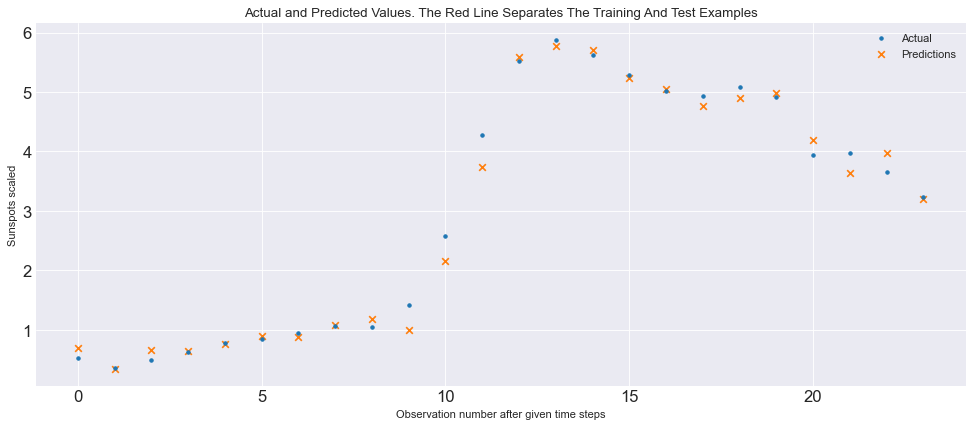

In [155]:
plot_result(teste_y.reshape(len(teste_y))[24:48], predict_y.reshape(len(teste_y))[24:48])

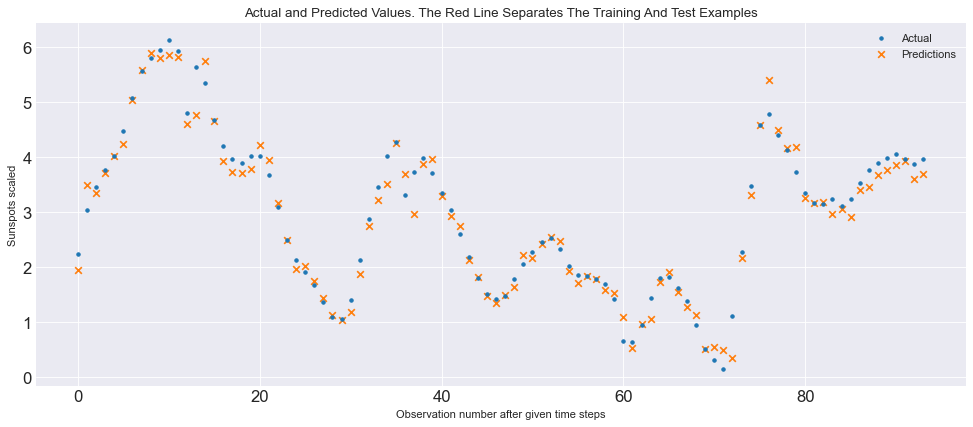

In [156]:
plot_result(teste_y.reshape(len(teste_y))[2000:2094], predict_y.reshape(len(teste_y))[2000:2094])

# coef + time serie original

In [530]:
OUT_STEPS = 1
model_with_original = tf.keras.Sequential([
        # Shape [batch, time, features] => [batch, lstm_units].
        # Adding more `lstm_units` just overfits more quickly.
        tf.keras.layers.GRU(32, return_sequences=False),
        # Shape => [batch, out_steps*features].
        tf.keras.layers.Dense(OUT_STEPS,
                          kernel_initializer=tf.initializers.zeros()),
        # Shape => [batch, out_steps, features].
        tf.keras.layers.Reshape([OUT_STEPS, 1])
        ])

In [356]:
history = compile_and_fit(model_with_original, train_x_with_original, train_y)

Epoch 1/10
1018/1018 [==============================] - 164s 123ms/step - loss: 0.1131 - mae: 0.2147 - mape: 7.3903 - mse: 0.1131 - r_square: 0.9766
Epoch 2/10
1018/1018 [==============================] - 100s 98ms/step - loss: 0.1133 - mae: 0.2157 - mape: 7.4251 - mse: 0.1133 - r_square: 0.9766
Epoch 3/10
1018/1018 [==============================] - 117s 115ms/step - loss: 0.1145 - mae: 0.2161 - mape: 7.4193 - mse: 0.1145 - r_square: 0.9763


In [358]:
predict_y = model_with_original.predict(teste_x_with_original, verbose=0)

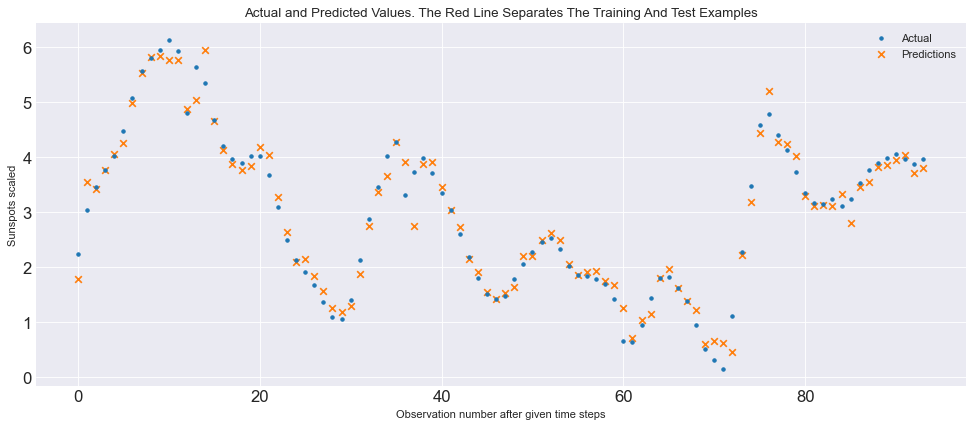

In [359]:
plot_result(teste_y.reshape(len(teste_y))[2000:2094], predict_y.reshape(len(teste_y))[2000:2094])

# 4 hours ahead

In [25]:
end = len(tt[input_step_time:])
steps_ahead = 4

In [81]:
del aa
aa = tt[input_step_time:] 

In [82]:
aa = [aa[i:i+steps_ahead] for i in range(end-steps_ahead)]
aa = np.array(aa)

In [84]:
aa = aa.reshape((end-steps_ahead,4,1))
aa.shape

(186108, 4, 1)

In [156]:
OUT_STEPS = steps_ahead
model_4_steps_ahead = tf.keras.Sequential([
                      # Shape [batch, time, features] => [batch, lstm_units].
                      # Adding more `lstm_units` just overfits more quickly.
                      tf.keras.layers.GRU(32, return_sequences=False),
                      # Shape => [batch, out_steps*features].
                      tf.keras.layers.Dense(OUT_STEPS,
                                          kernel_initializer=tf.initializers.zeros()),
                      # Shape => [batch, out_steps, features].
                      tf.keras.layers.Reshape([OUT_STEPS, 1])
                      ])


In [109]:
train_x_4_steps_ahead = vect_coeffs_reshape[0:split]
teste_x_4_steps_ahead = vect_coeffs_reshape[split:-steps_ahead]
train_y_4_steps_ahead = aa[0:split]
teste_y_4_steps_ahead = aa[split:]

In [111]:
len(train_x_4_steps_ahead)

130278

In [110]:
len(train_y_4_steps_ahead)

130278

In [159]:
history_4_steps_ahead = compile_and_fit(model_4_steps_ahead, train_x_4_steps_ahead, train_y_4_steps_ahead)

Epoch 1/40
1018/1018 [==============================] - 138s 129ms/step - loss: 0.8498 - mae: 0.6555 - mape: 24.4950 - mse: 0.8498 - r_square: 0.8243
Epoch 2/40
1018/1018 [==============================] - 131s 129ms/step - loss: 0.8093 - mae: 0.6360 - mape: 23.8678 - mse: 0.8093 - r_square: 0.8327
Epoch 3/40
1018/1018 [==============================] - 131s 128ms/step - loss: 0.7842 - mae: 0.6233 - mape: 23.4335 - mse: 0.7842 - r_square: 0.8379
Epoch 4/40
1018/1018 [==============================] - 133s 130ms/step - loss: 0.7699 - mae: 0.6155 - mape: 23.1589 - mse: 0.7699 - r_square: 0.8408
Epoch 5/40
1018/1018 [==============================] - 129s 127ms/step - loss: 0.7579 - mae: 0.6100 - mape: 22.9306 - mse: 0.7579 - r_square: 0.8433
Epoch 6/40
1018/1018 [==============================] - 130s 128ms/step - loss: 0.7496 - mae: 0.6058 - mape: 22.7718 - mse: 0.7496 - r_square: 0.8450
Epoch 7/40
1018/1018 [==============================] - 129s 127ms/step - loss: 0.7416 - mae: 0.6020

In [160]:
predict_y_4_steps_ahead = model_4_steps_ahead.predict(teste_x_4_steps_ahead, verbose=2)

1745/1745 - 35s - 35s/epoch - 20ms/step


In [144]:
teste_y_4_steps_ahead[0].transpose().shape

(1, 4)

In [146]:
predict_y_4_steps_ahead[0].transpose().shape

(1, 4)

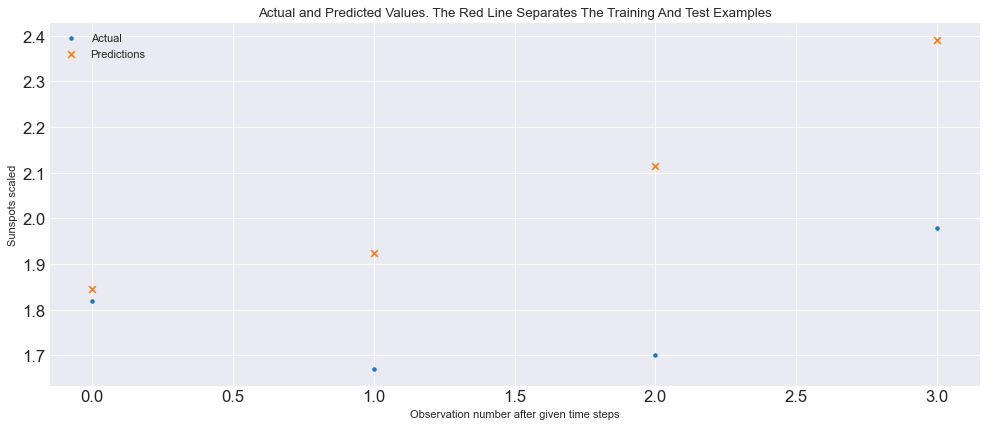

In [174]:
plot_result(teste_y_4_steps_ahead[9], predict_y_4_steps_ahead[9])

In [139]:
a=teste_y_4_steps_ahead[0].transpose()

In [ ]:
b=predict_y_4_steps_ahead.reshape[0].transpose()

# 2 hours ahead

In [185]:
steps_ahead = 2

In [198]:
del(aaa)
aaa = tt[input_step_time:] 
aaa = [aaa[i:i+steps_ahead] for i in range(end-steps_ahead)]
aaa = np.array(aaa)
aaa = aaa.reshape((end-steps_ahead,steps_ahead,1))
aaa.shape

(186110, 2, 1)

In [209]:
OUT_STEPS = steps_ahead
model_2_steps_ahead = tf.keras.Sequential([
                      # Shape [batch, time, features] => [batch, lstm_units].
                      # Adding more `lstm_units` just overfits more quickly.
                      tf.keras.layers.GRU(32, return_sequences=False),
                      # Shape => [batch, out_steps*features].
                      tf.keras.layers.Dense(OUT_STEPS,
                                          kernel_initializer=tf.initializers.zeros()),
                      # Shape => [batch, out_steps, features].
                      tf.keras.layers.Reshape([OUT_STEPS, 1])
                      ])

In [210]:
train_x_2_steps_ahead = vect_coeffs_reshape[0:split]
teste_x_2_steps_ahead = vect_coeffs_reshape[split:-steps_ahead]
train_y_2_steps_ahead = aaa[0:split]
teste_y_2_steps_ahead = aaa[split:]

In [211]:
history_2_steps_ahead = compile_and_fit(model_2_steps_ahead, train_x_2_steps_ahead, train_y_2_steps_ahead)

Epoch 1/40
1018/1018 [==============================] - 136s 127ms/step - loss: 3.2204 - mae: 1.2372 - mape: 38.1728 - mse: 3.2204 - r_square: 0.3342
Epoch 2/40
1018/1018 [==============================] - 125s 123ms/step - loss: 0.5302 - mae: 0.5236 - mape: 17.7312 - mse: 0.5302 - r_square: 0.8904
Epoch 3/40
1018/1018 [==============================] - 125s 123ms/step - loss: 0.4340 - mae: 0.4558 - mape: 15.7022 - mse: 0.4340 - r_square: 0.9103
Epoch 4/40
1018/1018 [==============================] - 127s 124ms/step - loss: 0.4032 - mae: 0.4314 - mape: 14.9733 - mse: 0.4032 - r_square: 0.9166
Epoch 5/40
1018/1018 [==============================] - 127s 125ms/step - loss: 0.3886 - mae: 0.4203 - mape: 14.6246 - mse: 0.3886 - r_square: 0.9197
Epoch 6/40
1018/1018 [==============================] - 132s 129ms/step - loss: 0.3783 - mae: 0.4127 - mape: 14.3862 - mse: 0.3783 - r_square: 0.9218
Epoch 7/40
1018/1018 [==============================] - 126s 124ms/step - loss: 0.3710 - mae: 0.4083

In [212]:
predict_y_2_steps_ahead = model_2_steps_ahead.predict(teste_x_2_steps_ahead, verbose=2)

1745/1745 - 29s - 29s/epoch - 16ms/step


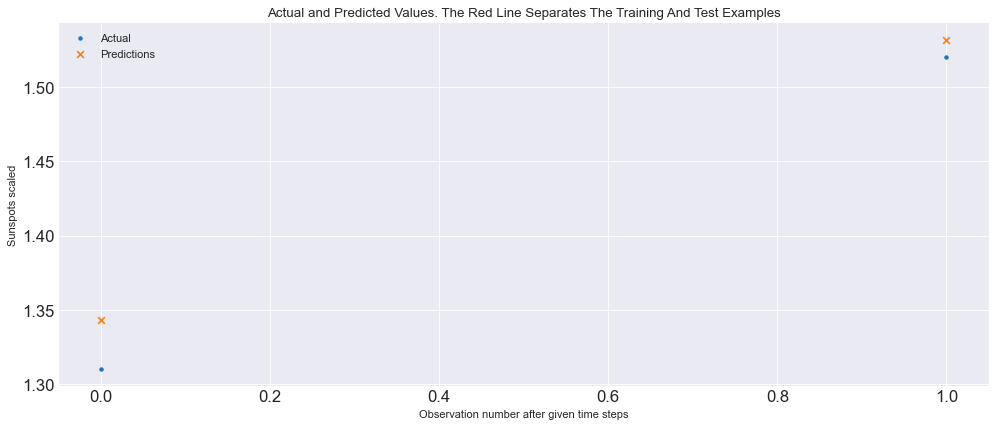

In [233]:
plot_result(teste_y_2_steps_ahead[0], predict_y_2_steps_ahead[0])

In [234]:
split

130278

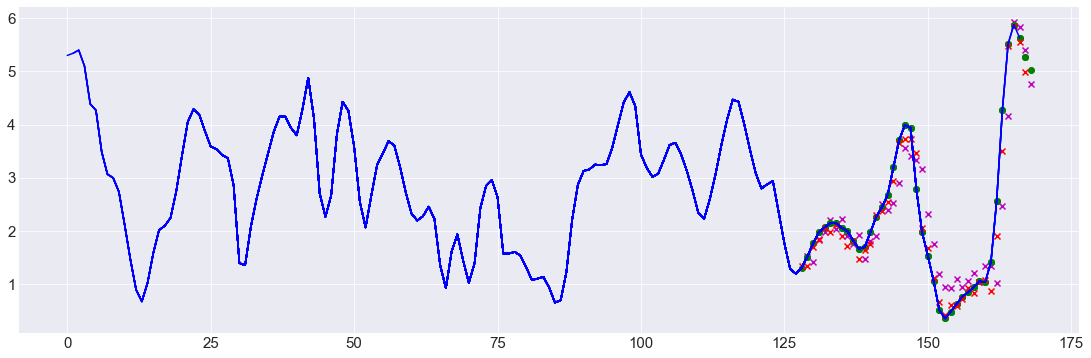

In [285]:
plt.figure(figsize=(19,6))
for i in range(40):
    s = i
    plt.plot(np.arange(s,input_step_time+s), tt[split+s:split+input_step_time+s], color='b')
    plt.scatter(np.arange(input_step_time+s,input_step_time+steps_ahead+s),
                tt[split+input_step_time+s:split+input_step_time+steps_ahead+s], color='g')
    plt.scatter(np.arange(input_step_time+s,input_step_time+1+s),
                predict_y_2_steps_ahead[s][0], marker='x', color='r')
    plt.scatter(np.arange(input_step_time+1+s,input_step_time+steps_ahead+s),
                predict_y_2_steps_ahead[s][1], marker='x', color='m')

In [245]:
steps_ahead

2

In [242]:
np.arange(input_step_time)

array([  0,   1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,
        13,  14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,
        26,  27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,
        39,  40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,
        52,  53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,
        65,  66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,
        78,  79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,
        91,  92,  93,  94,  95,  96,  97,  98,  99, 100, 101, 102, 103,
       104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116,
       117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127])

# Only GRU model

In [53]:
OUT_STEPS = 1
model_GRU_simple = tf.keras.Sequential([
                        # Shape [batch, time, features] => [batch, lstm_units].
                        # Adding more `lstm_units` just overfits more quickly.
                        tf.keras.layers.GRU(32, input_shape=(128,5), return_sequences=False),
                        # Shape => [batch, out_steps*features].
                        tf.keras.layers.Dense(OUT_STEPS,
                        kernel_initializer=tf.initializers.zeros()),
                        # Shape => [batch, out_steps, features].
                        tf.keras.layers.Reshape([OUT_STEPS, 1])
                        ])

In [66]:
train_x_only_original = AAA
teste_x_only_original = BBB
print(train_x_only_original.shape, teste_x_only_original.shape)

(130278, 128, 1) (55834, 128, 1)


In [68]:
history_only_original_acum  = []
model_GRU_simple = []
OUT_STEPS = 1
nodos = 8
for i in range(5):
    nodos = nodos*2
    m = tf.keras.Sequential([
                        # Shape [batch, time, features] => [batch, lstm_units].
                        # Adding more `lstm_units` just overfits more quickly.
                        tf.keras.layers.GRU(nodos, return_sequences=False),
                        # Shape => [batch, out_steps*features].
                        tf.keras.layers.Dense(OUT_STEPS,
                        kernel_initializer=tf.initializers.zeros()),
                        # Shape => [batch, out_steps, features].
                        tf.keras.layers.Reshape([OUT_STEPS, 1])
                        ])
    model_GRU_simple.append(m)
    history_only_original = compile_and_fit(model_GRU_simple[i], train_x_only_original, train_y)
    history_only_original_acum.append(history_only_original)

Epoch 1/100
509/509 [==============================] - 92s 123ms/step - loss: 7.7612 - mae: 2.0188 - mape: 46.0195 - mse: 7.7612 - r_square: -0.6045
Epoch 2/100
509/509 [==============================] - 69s 136ms/step - loss: 0.8044 - mae: 0.5433 - mape: 12.9635 - mse: 0.8044 - r_square: 0.8337
Epoch 3/100
509/509 [==============================] - 69s 135ms/step - loss: 0.3263 - mae: 0.3520 - mape: 9.8808 - mse: 0.3263 - r_square: 0.9325
Epoch 4/100
509/509 [==============================] - 60s 117ms/step - loss: 0.2307 - mae: 0.3014 - mape: 9.1424 - mse: 0.2307 - r_square: 0.9523
Epoch 5/100
509/509 [==============================] - 52s 102ms/step - loss: 0.2015 - mae: 0.2821 - mape: 8.8609 - mse: 0.2015 - r_square: 0.9583
Epoch 6/100
509/509 [==============================] - 52s 102ms/step - loss: 0.1885 - mae: 0.2728 - mape: 8.7779 - mse: 0.1885 - r_square: 0.9610
Epoch 7/100
509/509 [==============================] - 57s 111ms/step - loss: 0.1795 - mae: 0.2657 - mape: 8.6532 -

In [205]:
model

In [58]:
keras.utils.plot_model(model_GRU_simple[0], "model_GRU_simple.png", show_shapes=True, dpi=80)

You must install pydot (`pip install pydot`) and install graphviz (see instructions at https://graphviz.gitlab.io/download/) for plot_model/model_to_dot to work.


In [202]:
model_GRU_simple

In [203]:
del hist_GRU_models
hist_GRU_models = pd.DataFrame(columns=['loss', 'mae', 'mape', 'mse', 'r_square'])
hist_GRU_models

NameError: name 'hist_GRU_models' is not defined

In [59]:
hist_GRU.columns

NameError: name 'hist_GRU' is not defined

In [505]:
for i in range(10):
    hist_GRU = pd.DataFrame(history_only_original_acum[i].history)
    hist_GRU_models = hist_GRU_models.append(hist_GRU.drop(hist_GRU.index[:hist_GRU.index[-1]], axis=0), ignore_index=True)

In [452]:
hist_GRU['loss'].iloc[-1]

0.11331398040056229

In [453]:
hist_GRU['loss'][hist_GRU.index[-1]]

0.11331398040056229

In [498]:
# hist_GRU_models['Model'] = np.arange(1,11).tolist()

In [507]:
# hist_GRU_models.set_index('Model', inplace=True)
hist_GRU_models.index.rename('Model', inplace=True)
hist_GRU_models

loss       mae      mape       mse  r_square
Model                                                  
0      0.113314  0.212267  7.383882  0.113314  0.976574
1      0.123759  0.222652  7.545121  0.123759  0.974415
2      0.111829  0.210796  7.301804  0.111829  0.976881
3      0.157479  0.248414  8.287543  0.157479  0.967444
4      0.120017  0.217664  7.508746  0.120017  0.975188
5      0.218442  0.310037  9.756449  0.218442  0.954840
6      0.135287  0.231750  7.789184  0.135287  0.972031
7      0.131329  0.227977  7.711230  0.131329  0.972850
8      0.136521  0.233522  7.848129  0.136521  0.971776
9      0.113411  0.212623  7.335124  0.113411  0.976554

In [168]:
model_GRU_simple.evaluate(teste_x_only_original, teste_y, verbose=1)

RuntimeError: You must compile your model before training/testing. Use `model.compile(optimizer, loss)`.

In [164]:
model_GRU_simple_evaluate=[]

for i in range(1):
    model_GRU_simple_evaluate.append(model_GRU_simple[i].evaluate(teste_x_only_original, teste_y, verbose=1))

TypeError: 'Sequential' object is not subscriptable

In [518]:
model_GRU_simple_evaluate_df = pd.DataFrame(model_GRU_simple_evaluate, columns=['loss', 'mae', 'mape', 'mse', 'r_square'])
model_GRU_simple_evaluate_df.index.rename('Model', inplace=True)
model_GRU_simple_evaluate_df

loss       mae       mape       mse  r_square
Model                                                   
0      0.119297  0.218074   8.190801  0.119297  0.974572
1      0.125662  0.222106   8.296053  0.125662  0.973216
2      0.120467  0.218305   8.204532  0.120467  0.974323
3      0.157319  0.247924   9.228931  0.157319  0.966468
4      0.122072  0.220352   8.374768  0.122072  0.973981
5      0.202344  0.291151   9.947466  0.202344  0.956871
6      0.272372  0.361106  12.139384  0.272372  0.941945
7      0.144620  0.237330   8.784064  0.144620  0.969175
8      0.157145  0.255897   8.828018  0.157145  0.966505
9      0.121372  0.215656   8.034962  0.121372  0.974130

Para lembrar

......................................................................................

In [420]:
 xcxc = pd.DataFrame(history_only_original_acum[0].history).iloc[-1]

In [427]:
xcxc.shape

(5,)

In [435]:
list(history_only_original_acum[0].history)

['loss', 'mae', 'mape', 'mse', 'r_square']

In [449]:
list(history_only_original_acum[0].history.values())[4][32]

0.9765739440917969

......................................................................................

In [208]:
model_GRU_simple_predict_y = model_GRU_simple[0].predict(teste_x_only_original)

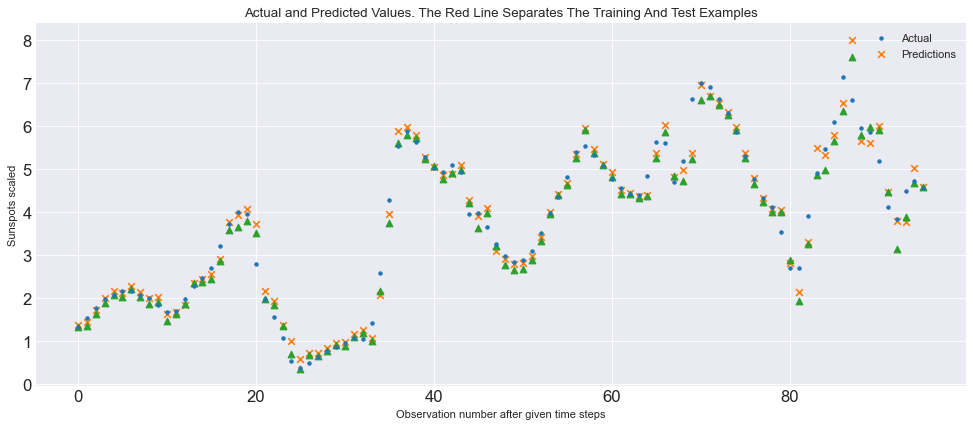

In [213]:
plot_result(teste_y.reshape(len(teste_y))[0:96], model_GRU_simple_predict_y.reshape(len(teste_y))[0:96])
plt.scatter(range(0,96), predict_y.reshape(len(teste_y))[0:96], marker='^')
            

# WTGRU model with only signals resulting from wavelet transform

In [520]:
history_model_WTGRU_only_WTinputs  = []
model_WTGRU_only_WTinputs = []
OUT_STEPS = 1
for i in range(10):
    m = tf.keras.Sequential([
                    # Shape [batch, time, features] => [batch, lstm_units].
                    # Adding more `lstm_units` just overfits more quickly.
                    tf.keras.layers.GRU(32, return_sequences=False),
                    # Shape => [batch, out_steps*features].
                    tf.keras.layers.Dense(OUT_STEPS,
                    kernel_initializer=tf.initializers.zeros()),
                    # Shape => [batch, out_steps, features].
                    tf.keras.layers.Reshape([OUT_STEPS, 1])
                    ])
    model_WTGRU_only_WTinputs.append(m)
    history_only_original = compile_and_fit(model_WTGRU_only_WTinputs[i], train_x, train_y)
    history_model_WTGRU_only_WTinputs.append(history_only_original)

Epoch 1/100
1018/1018 [==============================] - 197s 153ms/step - loss: 2.9199 - mae: 1.1172 - mape: 33.2867 - mse: 2.9199 - r_square: 0.3963
Epoch 2/100
1018/1018 [==============================] - 149s 147ms/step - loss: 0.2525 - mae: 0.3502 - mape: 11.5017 - mse: 0.2525 - r_square: 0.9478
Epoch 3/100
1018/1018 [==============================] - 160s 157ms/step - loss: 0.1925 - mae: 0.2948 - mape: 9.8247 - mse: 0.1925 - r_square: 0.9602
Epoch 4/100
1018/1018 [==============================] - 152s 149ms/step - loss: 0.1775 - mae: 0.2789 - mape: 9.2695 - mse: 0.1775 - r_square: 0.9633
Epoch 5/100
1018/1018 [==============================] - 151s 149ms/step - loss: 0.1700 - mae: 0.2708 - mape: 9.0370 - mse: 0.1700 - r_square: 0.9649
Epoch 6/100
1018/1018 [==============================] - 148s 146ms/step - loss: 0.1649 - mae: 0.2652 - mape: 8.8826 - mse: 0.1649 - r_square: 0.9659
Epoch 7/100
1018/1018 [==============================] - 157s 154ms/step - loss: 0.1613 - mae: 0.2

In [410]:
history_model_WTGRU_only_WTinputs

NameError: name 'history_model_WTGRU_only_WTinputs' is not defined

In [521]:
model_WTGRU_only_WTinputs_evaluate=[]

for i in range(10):
    model_WTGRU_only_WTinputs_evaluate.append(model_WTGRU_only_WTinputs[i].evaluate(teste_x, teste_y, verbose=1))

1745/1745 [==============================] - 68s 22ms/step - loss: 0.1345 - mae: 0.2378 - mape: 8.7686 - mse: 0.1345 - r_square: 0.9713 5s - loss: 0.1341 - mae:  - ETA: 2s - loss: 0.1363 - mae: 0.2388 - mape: 8.7987 - mse: 0.1363 - r_s - ETA: 1s - loss: 0.1360 - mae: 0.2388 - mape: 8.8037 -


In [522]:
model_WTGRU_only_WTinputs_evaluate_df = pd.DataFrame(model_WTGRU_only_WTinputs_evaluate, columns=['loss', 'mae', 'mape', 'mse', 'r_square'])
model_WTGRU_only_WTinputs_evaluate_df.index.rename('Model', inplace=True)
model_WTGRU_only_WTinputs_evaluate_df

loss       mae      mape       mse  r_square
Model                                                  
0      0.141294  0.245659  9.466305  0.141294  0.969884
1      0.136973  0.241830  8.898893  0.136973  0.970805
2      0.127738  0.235567  8.935685  0.127738  0.972773
3      0.134358  0.235452  8.698762  0.134358  0.971362
4      0.130715  0.237315  9.046906  0.130715  0.972138
5      0.140334  0.245285  8.547893  0.140334  0.970088
6      0.134798  0.237515  8.989694  0.134798  0.971268
7      0.132678  0.236337  9.389786  0.132678  0.971720
8      0.131425  0.234743  8.799199  0.131425  0.971987
9      0.134496  0.237841  8.768588  0.134496  0.971332

# WT GRU with coeff + original

In [63]:
train_x_with_original.shape

(130278, 128, 6)

In [64]:
len(train_y)

130278

In [103]:
history_model_WTGRU_WT_original  = []
model_WTGRU_WT_original = []
OUT_STEPS = 1
for i in range(10):
    m = tf.keras.Sequential([
                    # Shape [batch, time, features] => [batch, lstm_units].
                    # Adding more `lstm_units` just overfits more quickly.
                    tf.keras.layers.GRU(32, return_sequences=False),
                    # Shape => [batch, out_steps*features].
                    tf.keras.layers.Dense(OUT_STEPS,
                    kernel_initializer=tf.initializers.zeros()),
                    # Shape => [batch, out_steps, features].
                    tf.keras.layers.Reshape([OUT_STEPS, 1])
                    ])
    model_WTGRU_WT_original.append(m)
    history = compile_and_fit(model_WTGRU_WT_original[i], train_x_with_original, train_y)
    history_model_WTGRU_WT_original.append(history)

Epoch 1/100
509/509 [==============================] - 90s 164ms/step - loss: 4.5808 - mae: 1.3799 - mape: 33.8502 - mse: 4.5808 - r_square: 0.0530
Epoch 2/100
509/509 [==============================] - 82s 161ms/step - loss: 0.3095 - mae: 0.3514 - mape: 10.1307 - mse: 0.3095 - r_square: 0.9360
Epoch 3/100
509/509 [==============================] - 83s 163ms/step - loss: 0.1992 - mae: 0.2853 - mape: 9.0034 - mse: 0.1992 - r_square: 0.9588
Epoch 4/100
509/509 [==============================] - 85s 166ms/step - loss: 0.1766 - mae: 0.2675 - mape: 8.6835 - mse: 0.1766 - r_square: 0.9635
Epoch 5/100
509/509 [==============================] - 82s 161ms/step - loss: 0.1666 - mae: 0.2585 - mape: 8.5121 - mse: 0.1666 - r_square: 0.9656
Epoch 6/100
509/509 [==============================] - 81s 159ms/step - loss: 0.1603 - mae: 0.2529 - mape: 8.3898 - mse: 0.1603 - r_square: 0.9669
Epoch 7/100
509/509 [==============================] - 81s 160ms/step - loss: 0.1555 - mae: 0.2485 - mape: 8.2882 - 

In [104]:
del history_WTGRU_WT_original,  temp
history_WTGRU_WT_original = pd.DataFrame(columns=['loss', 'mae', 'mape', 'mse', 'r_square'])
history_WTGRU_WT_original

Empty DataFrame
Columns: [loss, mae, mape, mse, r_square]
Index: []

In [105]:
for i in range(10): 
    temp = pd.DataFrame(history_model_WTGRU_WT_original[i].history).iloc[-1]   
    history_WTGRU_WT_original = history_WTGRU_WT_original.append(temp) 
    
history_WTGRU_WT_original["Model"] = np.arange(0,10)

In [106]:
history_WTGRU_WT_original.set_index('Model', inplace=True)
history_WTGRU_WT_original

loss       mae      mape       mse  r_square
Model                                                  
0      0.112700  0.213725  7.379189  0.112700  0.976701
1      0.112344  0.213435  7.365473  0.112344  0.976775
2      0.117316  0.216912  7.435171  0.117316  0.975747
3      0.115155  0.214588  7.381890  0.115155  0.976193
4      0.126275  0.223932  7.591225  0.126275  0.973895
5      0.125998  0.224408  7.600643  0.125998  0.973952
6      0.115280  0.214984  7.374678  0.115280  0.976168
7      0.125339  0.223959  7.563516  0.125339  0.974088
8      0.127069  0.224574  7.570026  0.127069  0.973730
9      0.118095  0.218783  7.493869  0.118095  0.975585

In [107]:
model_WTGRU_WT_original_evaluate=[]

for i in range(10):
    model_WTGRU_WT_original_evaluate.append(model_WTGRU_WT_original[i].evaluate(teste_x_with_original, teste_y, verbose=1))

1745/1745 [==============================] - 37s 15ms/step - loss: 0.1255 - mae: 0.2249 - mape: 8.2456 - mse: 0.1255 - r_square: 0.9732 1s - loss: 0.1267 - mae: 0.2254 - mape: 8.2644 - 


In [108]:
model_WTGRU_WT_original_evaluate_df = pd.DataFrame(model_WTGRU_WT_original_evaluate, columns=['loss', 'mae', 'mape', 'mse', 'r_square'])
model_WTGRU_WT_original_evaluate_df.index.rename('Model', inplace=True)
model_WTGRU_WT_original_evaluate_df

loss       mae      mape       mse  r_square
Model                                                  
0      0.119630  0.218284  8.255258  0.119630  0.974501
1      0.119059  0.217145  8.264544  0.119059  0.974623
2      0.120659  0.219098  8.290874  0.120659  0.974282
3      0.122585  0.218739  8.095741  0.122585  0.973871
4      0.127243  0.223505  8.175192  0.127243  0.972879
5      0.132924  0.228783  8.512484  0.132924  0.971668
6      0.121532  0.221613  8.153748  0.121532  0.974096
7      0.133400  0.233171  8.970108  0.133400  0.971566
8      0.127853  0.224909  8.110957  0.127853  0.972749
9      0.125507  0.224907  8.245588  0.125507  0.973249

In [215]:
model_WTGRU_WT_original_predict_y = model_WTGRU_WT_original[3].predict(teste_x_with_original)

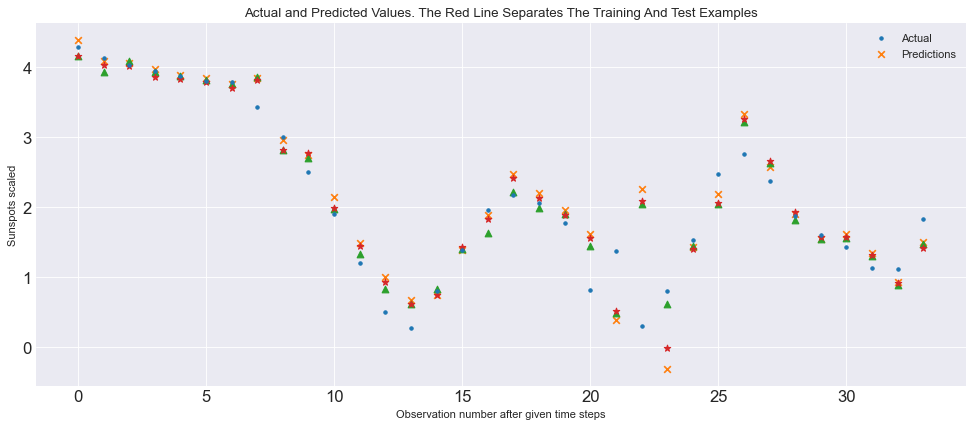

In [218]:
plot_result(teste_y.reshape(len(teste_y))[96:130], model_GRU_simple_predict_y.reshape(len(teste_y))[96:130])
plt.scatter(range(0,34), predict_y.reshape(len(teste_y))[96:130], marker='^')
plt.scatter(range(0,34), model_WTGRU_WT_original_predict_y.reshape(len(teste_y))[96:130], marker='*')

# Modelo com treinameto WT incorreto

In [220]:
pywt.swt_max_level(len(tt))

7

In [58]:
coeffs_all_signal = pywt.swt(tt[:], wavelet, level=4, trim_approx=True, norm=True)


In [59]:
type(coeffs_all_signal)

list

In [62]:
del ap_data2

In [63]:
ap_data2 = pd.DataFrame()
ap_data2['Wind_speed'] = list(ap_data['Wind Speed'][:])

In [64]:
ap_data2['A1'] = coeffs_all_signal[0]
ap_data2['D1'] = coeffs_all_signal[1]
ap_data2['D2'] = coeffs_all_signal[2]
ap_data2['D3'] = coeffs_all_signal[3]
ap_data2['D4'] = coeffs_all_signal[4]

In [65]:
ap_data2

Wind_speed        A1        D1        D2        D3        D4
0             1.79  2.131959 -1.038422 -0.775700  0.084934  0.132601
1             1.64  1.969950 -0.898626 -0.565987 -0.475868  0.065197
2             1.30  1.845404 -0.728447 -0.219511 -0.648006 -0.297960
3             0.82  1.756232 -0.495681  0.056436 -0.310233 -0.260854
4             1.25  1.714752 -0.228865  0.147957  0.072208 -0.003187
...            ...       ...       ...       ...       ...       ...
186235        1.68  3.375801 -1.464434 -0.462516 -0.344586 -0.041112
186236        1.33  3.098655 -1.479732 -0.264482 -0.477122 -0.065131
186237        1.02  2.812798 -1.408924 -0.282637 -0.253163 -0.166734
186238        0.89  2.544301 -1.286306 -0.468851  0.218222 -0.135885
186239        1.20  2.318181 -1.163708 -0.703159  0.415230  0.227093

[186240 rows x 6 columns]

In [69]:
len(ap_data2)

186240

In [70]:
train_x_SWT_all_signal =[ap_data2[i:i+128] for i in range(0,len(ap_data2)-129)]

In [71]:
np.array(train_x_SWT_all_signal).shape

(186111, 128, 6)

In [72]:
split

130278

In [73]:
teste_x_SWT_all_signal = np.array(train_x_SWT_all_signal)[split:]

In [350]:
teste_y_SWT_all_signal = teste_y

In [374]:
train_x_SWT_all_signal_2 = np.array(train_x_SWT_all_signal)[0:split]

In [375]:
train_x_SWT_all_signal_2.shape

(130278, 128, 6)

In [376]:
train_y_SWT_all_signal_2 = train_y

In [377]:
train_y_SWT_all_signal_2.shape

(130278, 1, 1)

In [378]:
 model_SWT_all_signal = tf.keras.Sequential([
                    # Shape [batch, time, features] => [batch, lstm_units].
                    # Adding more `lstm_units` just overfits more quickly.
                    tf.keras.layers.GRU(32, return_sequences=False),
                    # Shape => [batch, out_steps*features].
                    tf.keras.layers.Dense(OUT_STEPS,
                    kernel_initializer=tf.initializers.zeros()),
                    # Shape => [batch, out_steps, features].
                    tf.keras.layers.Reshape([OUT_STEPS, 1])
                    ])
    
history_model_SWT_all_signal = compile_and_fit(model_SWT_all_signal, train_x_SWT_all_signal_2, train_y_SWT_all_signal_2)

Epoch 1/100
509/509 [==============================] - 98s 163ms/step - loss: 4.3343 - mae: 1.2541 - mape: 28.1911 - mse: 4.3343 - r_square: 0.1040
Epoch 2/100
509/509 [==============================] - 84s 165ms/step - loss: 0.1318 - mae: 0.1594 - mape: 3.6324 - mse: 0.1318 - r_square: 0.9728
Epoch 3/100
509/509 [==============================] - 87s 170ms/step - loss: 0.0365 - mae: 0.0826 - mape: 2.2303 - mse: 0.0365 - r_square: 0.9924
Epoch 4/100
509/509 [==============================] - 86s 169ms/step - loss: 0.0187 - mae: 0.0604 - mape: 1.7372 - mse: 0.0187 - r_square: 0.9961
Epoch 5/100
509/509 [==============================] - 85s 167ms/step - loss: 0.0120 - mae: 0.0492 - mape: 1.4555 - mse: 0.0120 - r_square: 0.9975
Epoch 6/100
509/509 [==============================] - 87s 171ms/step - loss: 0.0083 - mae: 0.0410 - mape: 1.2250 - mse: 0.0083 - r_square: 0.9983
Epoch 7/100
509/509 [==============================] - 88s 172ms/step - loss: 0.0059 - mae: 0.0348 - mape: 1.0453 - m

In [380]:
history_model_SWT_all_signal = compile_and_fit(model_SWT_all_signal, train_x_SWT_all_signal_2, train_y_SWT_all_signal_2)

Epoch 1/100
509/509 [==============================] - 140s 223ms/step - loss: 1.6132e-04 - mae: 0.0058 - mape: 0.1816 - mse: 1.6132e-04 - r_square: 1.0000
Epoch 2/100
509/509 [==============================] - 127s 250ms/step - loss: 4.9332e-05 - mae: 0.0041 - mape: 0.1364 - mse: 4.9332e-05 - r_square: 1.0000
Epoch 3/100
509/509 [==============================] - 136s 268ms/step - loss: 5.3991e-05 - mae: 0.0045 - mape: 0.1463 - mse: 5.3991e-05 - r_square: 1.0000
Epoch 4/100
509/509 [==============================] - 136s 267ms/step - loss: 5.6812e-05 - mae: 0.0048 - mape: 0.1555 - mse: 5.6812e-05 - r_square: 1.0000


In [409]:
model.summary()

Model: "sequential_36"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 gru_36 (GRU)                (None, 128)               51840     
                                                                 
 dense_36 (Dense)            (None, 1)                 129       
                                                                 
 reshape_35 (Reshape)        (None, 1, 1)              0         
                                                                 
Total params: 51,969
Trainable params: 51,969
Non-trainable params: 0
_________________________________________________________________


In [408]:
model_SWT_all_signal.layers[1].get_config()

{'name': 'dense_44',
 'trainable': True,
 'dtype': 'float32',
 'units': 1,
 'activation': 'linear',
 'use_bias': True,
 'kernel_initializer': {'class_name': 'Zeros', 'config': {}},
 'bias_initializer': {'class_name': 'Zeros', 'config': {}},
 'kernel_regularizer': None,
 'bias_regularizer': None,
 'activity_regularizer': None,
 'kernel_constraint': None,
 'bias_constraint': None}

In [385]:
teste_y_SWT_all_signal[0:-2]

array([[1.31]])

In [389]:
train_y_SWT_all_signal_2[130277]

array([[1.2]])

In [390]:
model_SWT_all_signal.evaluate(teste_x_SWT_all_signal, teste_y_SWT_all_signal[0:-1])

1745/1745 [==============================] - 72s 25ms/step - loss: 4.3496e-05 - mae: 0.0031 - mape: 0.1152 - mse: 4.3496e-05 - r_square: 1.0000ETA: 22s - loss: 5.7846e-05 - mae: 0.0032 - mape: 0.1103 -  - ETA: 18s - loss: 5. - ETA: 16s - loss: 5.2261e-05 - mae: 0.0032 - mape: 0.1 - ETA: 15s - loss: 5.1037e-05 - m - ETA: 13s - loss: 5.1828e-05 - mae: 0.0032 - mape: 0.1175 - ms - ETA: 12s - loss: 5.0495e-05 - ETA: 10s - loss: 5.1637e-05 - mae: 0.0032 - ma - ETA: 8s - loss: 4. - ETA: 4s - loss: 4.6173e-05 - mae: 0.0031 - mape: 0.1149 - mse - ETA: 2s - loss: 4.5109e-05 - mae: 0.0031 - mape: 0.1158 - mse: 4.5109e-05 - r_square: - ETA: 1s - loss: 4.4711e-05 - mae: 0.0031 - mape: 0.1154 - mse: 4.4711e-05 - r_square: 1.0 - ETA: 1s - loss: 4.4551e-05 - mae: 0.0031 - mape: 0.1151 - mse: 4.4


[4.3496442231116816e-05,
 0.0030839669052511454,
 0.11517370492219925,
 4.3496442231116816e-05,
 0.999990701675415]

In [391]:
predict_y_model_SWT_all_signal = model_SWT_all_signal.predict(teste_x_SWT_all_signal)

In [400]:
plt.style.use('default')

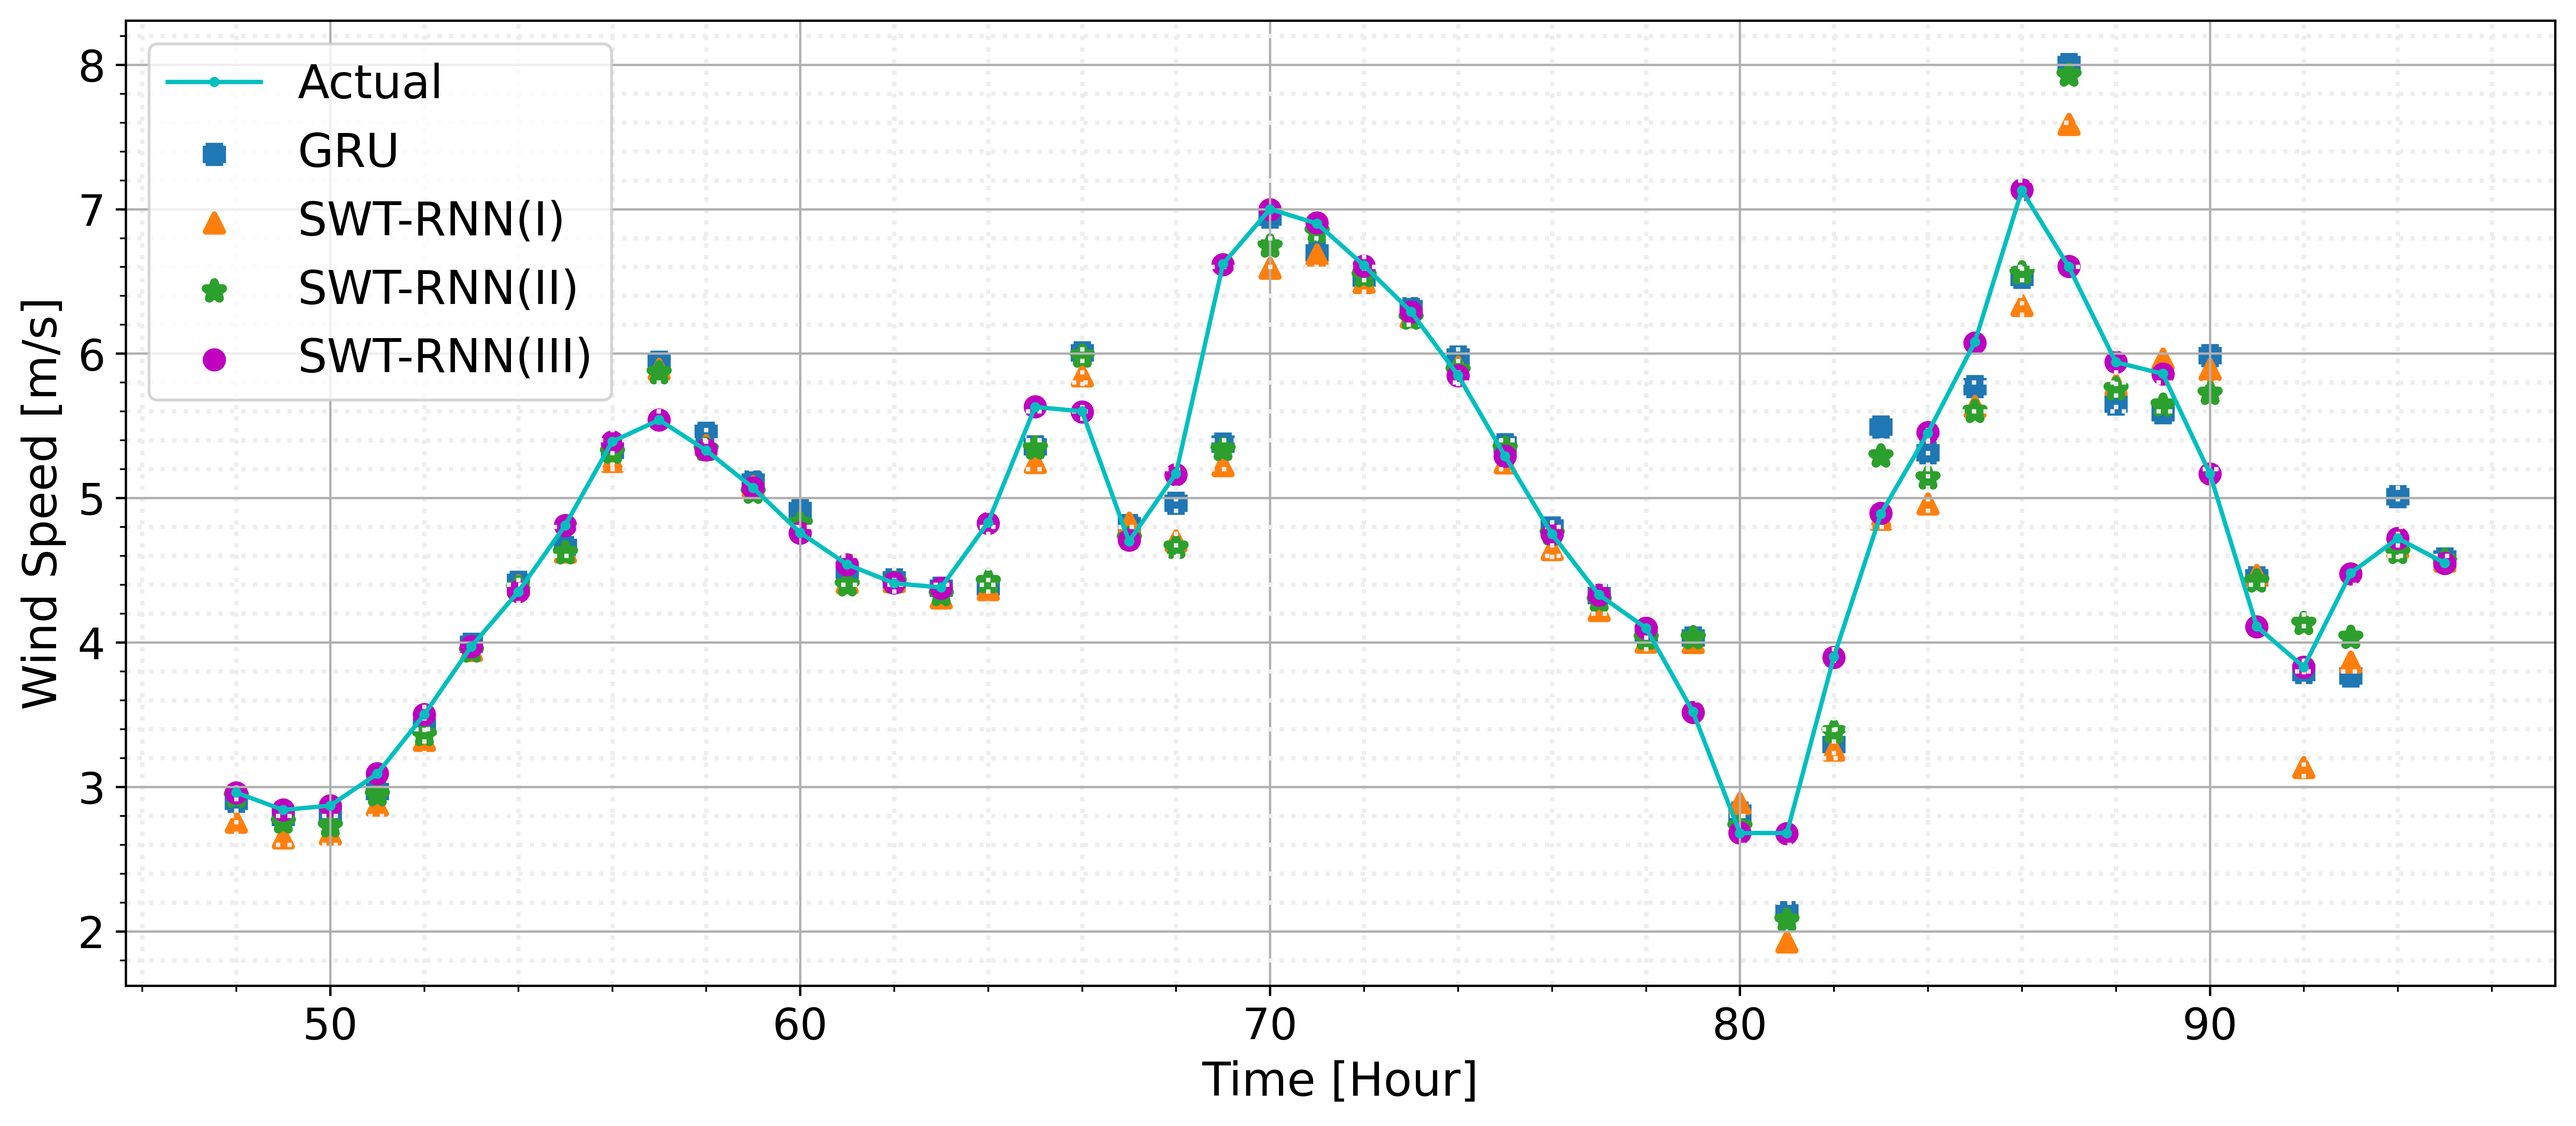

In [569]:
#plot_result(teste_y.reshape(len(teste_y))[96:130], model_GRU_simple_predict_y.reshape(len(teste_y))[96:130])
plt.figure(figsize=(15, 6), dpi=600)
plt.plot(range(48,96), teste_y.reshape(len(teste_y))[48:96], color='c', marker='.', markersize=5)
plt.scatter(range(48,96), model_GRU_simple_predict_y.reshape(len(teste_y))[48:96], marker='+', linewidths=8)
plt.scatter(range(48,96), predict_y.reshape(len(teste_y))[48:96], marker='^', linewidths=2)
plt.scatter(range(48,96), model_WTGRU_WT_original_predict_y.reshape(len(teste_y))[48:96], marker='*', linewidths=3)
plt.scatter(range(48,96), predict_y_model_SWT_all_signal.reshape(len(teste_y)-1)[48:96], color='m', marker='o', linewidths=2)
plt.legend(['Actual', 'GRU', 'SWT-RNN(I)', 'SWT-RNN(II)', 'SWT-RNN(III)'], fontsize=16)
plt.xlabel('Time [Hour]', fontsize=16)
plt.ylabel('Wind Speed [m/s]', fontsize=16)
#plt.title ('Actual and Predicted Values')

plt.minorticks_on()
plt.grid(True, which='major')
plt.grid(True, which='minor', color='#EEEEEE', linestyle=':', linewidth=1.5)
#plt.rcParams.update({'font.size': 10})

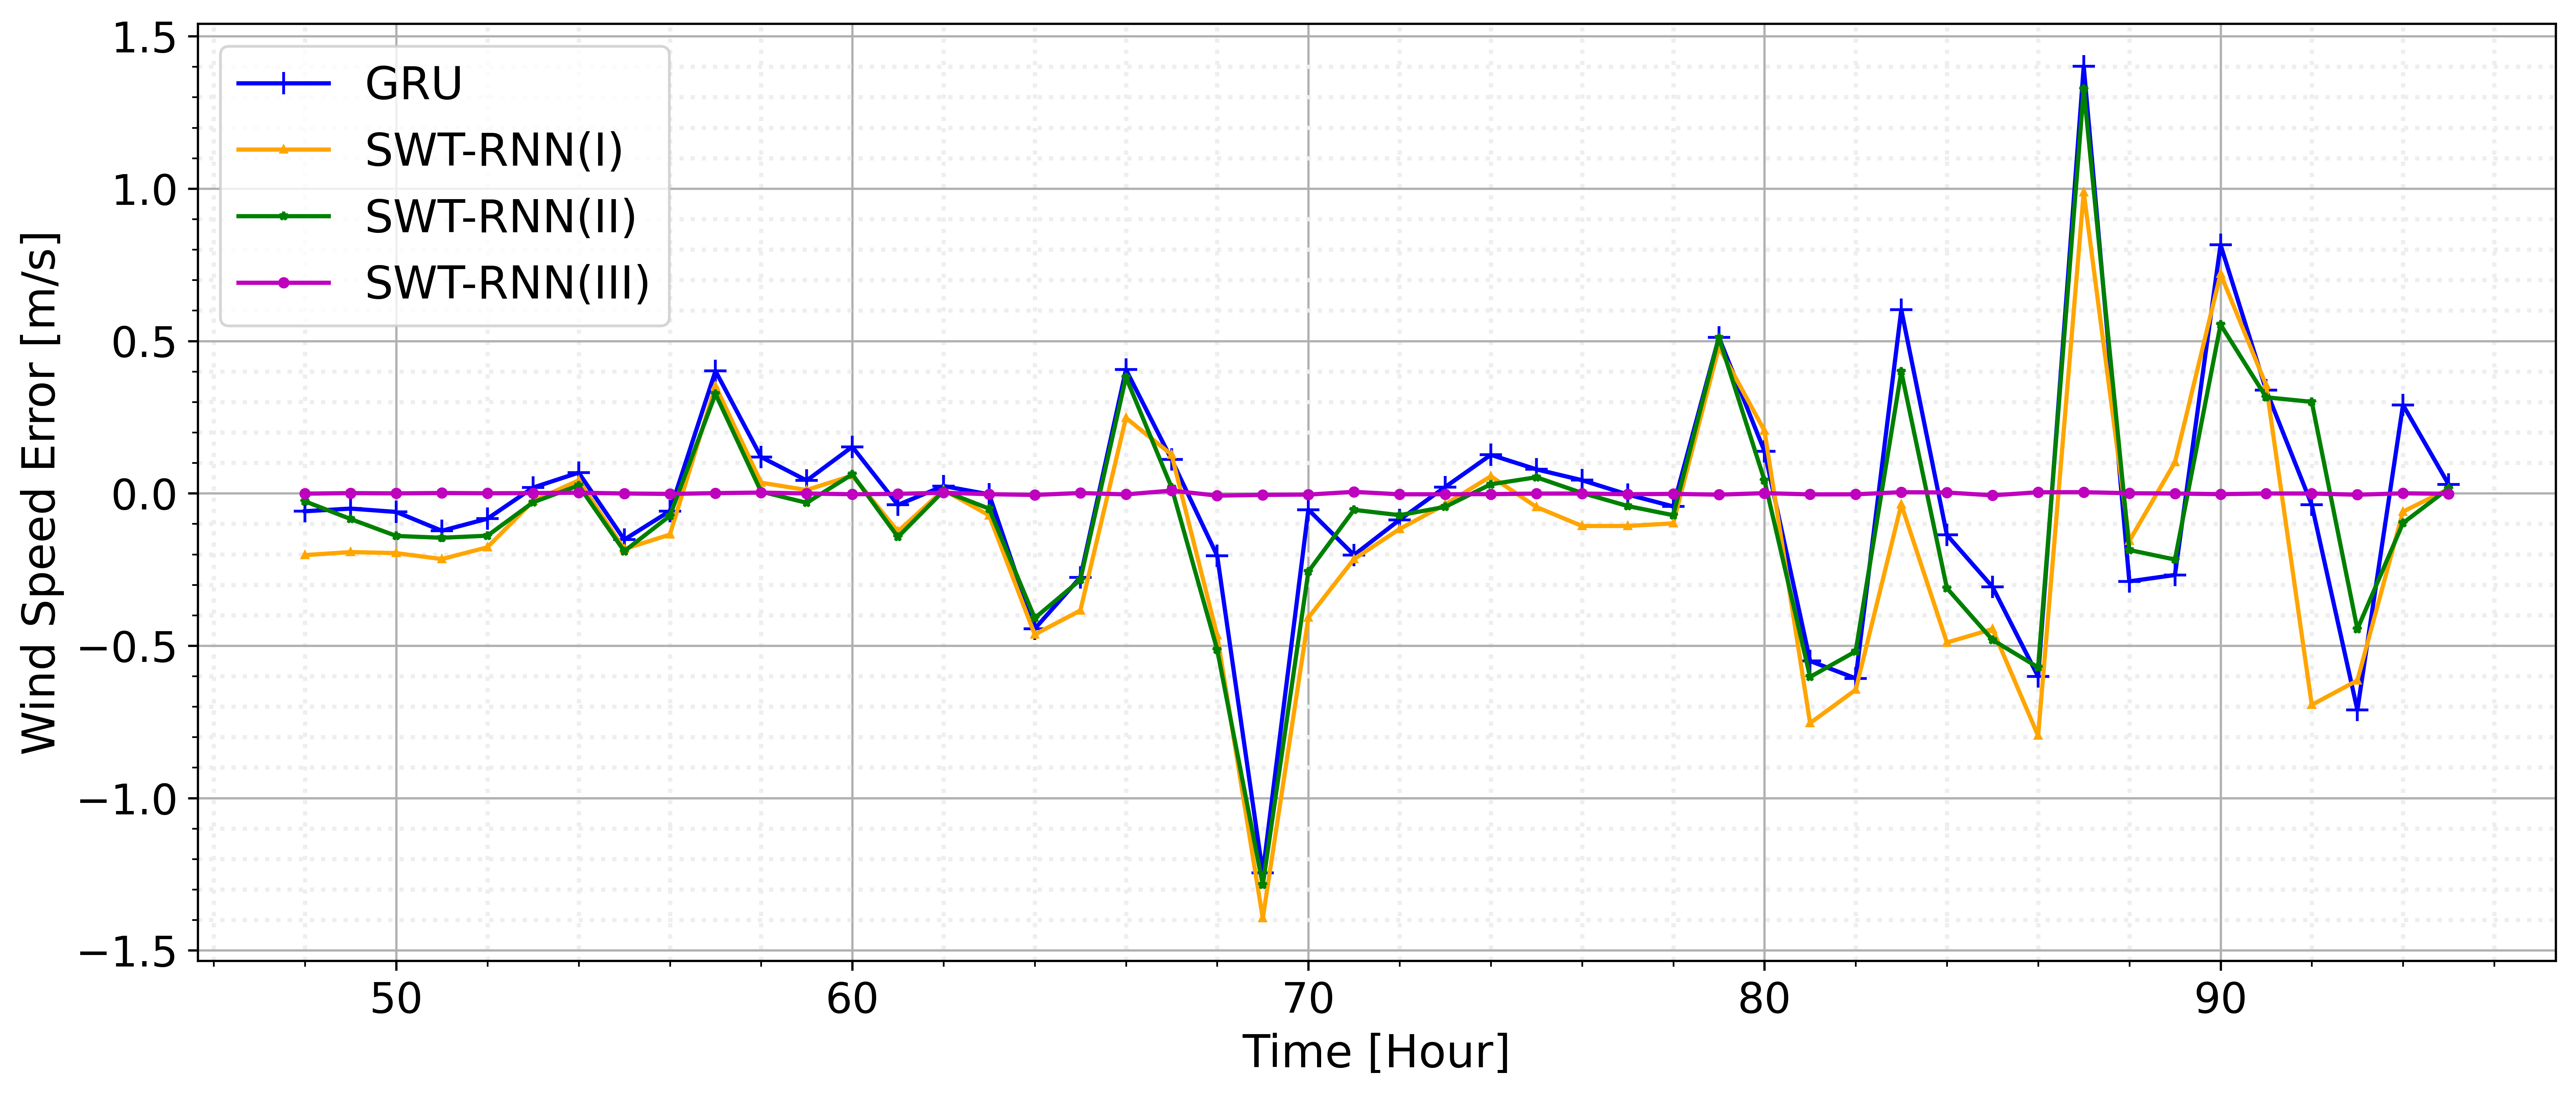

In [570]:
A=-teste_y.reshape(len(teste_y))[48:96]+model_GRU_simple_predict_y.reshape(len(teste_y))[48:96]
B=-teste_y.reshape(len(teste_y))[48:96]+predict_y.reshape(len(teste_y))[48:96]
C=-teste_y.reshape(len(teste_y))[48:96]+model_WTGRU_WT_original_predict_y.reshape(len(teste_y))[48:96]
D=-teste_y.reshape(len(teste_y))[48:96]+predict_y_model_SWT_all_signal.reshape(len(teste_y)-1)[48:96]


plt.figure(figsize=(15, 6), dpi=600)
plt.plot(range(48,96), A, color='b', marker='+', markersize=8)
plt.plot(range(48,96), B, color='orange', marker='^', markersize=2)
plt.plot(range(48,96), C, color='g', marker='*', markersize=3)
plt.plot(range(48,96), D, color='m', marker='o', markersize=3)

plt.legend(['GRU', 'SWT-RNN(I)', 'SWT-RNN(II)', 'SWT-RNN(III)'], fontsize=16)
plt.xlabel('Time [Hour]', fontsize=16)
plt.ylabel('Wind Speed Error [m/s]', fontsize=16)

plt.minorticks_on()
plt.grid(True, which='major')
plt.grid(True, which='minor', color='#EEEEEE', linestyle=':', linewidth=1.5)

plt.rcParams.update({'font.size': 20})

In [491]:
disterro_A =-teste_y.reshape(len(teste_y))[:]+model_GRU_simple_predict_y.reshape(len(teste_y))[:]
disterro_B=-teste_y.reshape(len(teste_y))[:]+predict_y.reshape(len(teste_y))[:]
disterro_C=-teste_y.reshape(len(teste_y))[:]+model_WTGRU_WT_original_predict_y.reshape(len(teste_y))[:]
disterro_D=-teste_y.reshape(len(teste_y))[:-1]+predict_y_model_SWT_all_signal.reshape(len(teste_y)-1)[:]

In [529]:
wA = np.ones_like(disterro_A)/len(disterro_A)
wB = np.ones_like(disterro_B)/len(disterro_B)
wC = np.ones_like(disterro_C)/len(disterro_C)
wD = np.ones_like(disterro_D)/len(disterro_D)

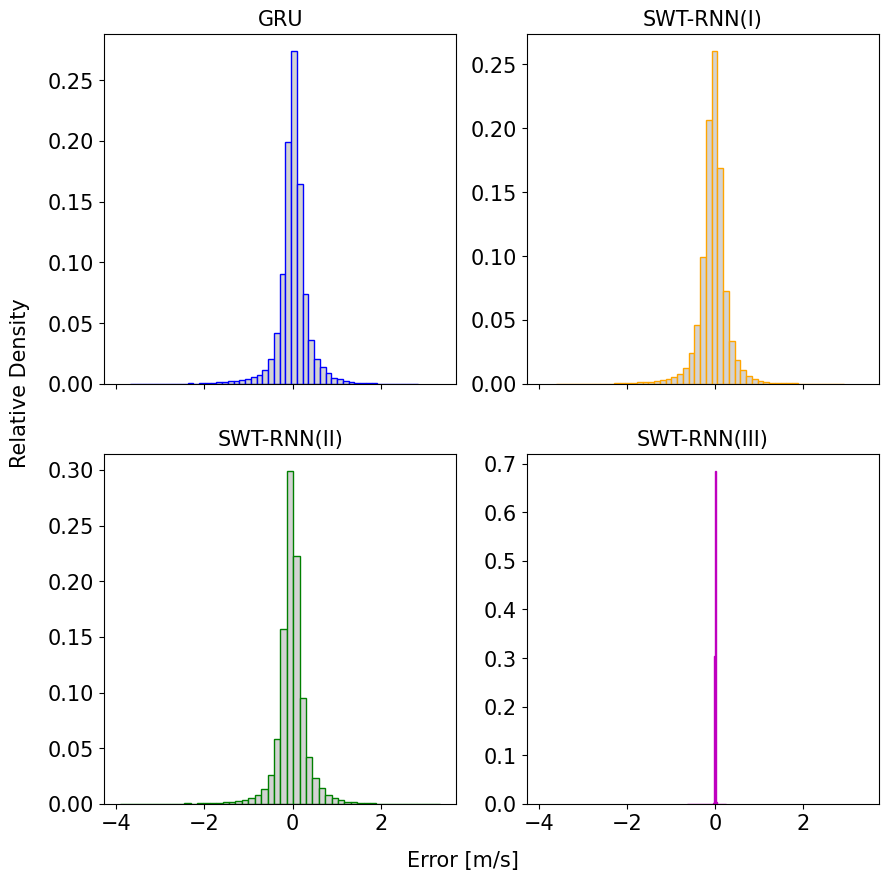

In [642]:
fig, axs = plt.subplots(2, 2, figsize=(10,10), sharex='all')
axs[0, 0].hist(disterro_A, bins=50, color="lightgrey", edgecolor='b', weights=wA)
axs[0, 1].hist(disterro_B, bins=50, color="lightgrey", edgecolor='orange', weights=wB)   
axs[1, 0].hist(disterro_C, bins=50, color="lightgrey", edgecolor='g', weights=wC)   
axs[1, 1].hist(disterro_D, bins=50, color="lightgrey", edgecolor='m', weights=wD) 
plt.text(-16, 0.7 , 'Relative Density', rotation=90, fontsize='15')
plt.text(-7, -0.13 , 'Error [m/s]', fontsize='15')
axs[0,0].set_title('GRU', fontsize='15')
axs[0,1].set_title('SWT-RNN(I)', fontsize='15')
axs[1,0].set_title('SWT-RNN(II)', fontsize='15')
axs[1,1].set_title('SWT-RNN(III)', fontsize='15')

axs[0, 0].tick_params(axis='both', which='major', labelsize=15)
axs[0, 1].tick_params(axis='both', which='major', labelsize=15)
axs[1, 0].tick_params(axis='both', which='major', labelsize=15)
axs[1, 1].tick_params(axis='both', which='major', labelsize=15)

#plt.legend(['GRU', 'SWT-RNN(I)', 'SWT-RNN(II)', 'SWT-RNN(III)'], fontsize=16)
#plt.xlabel('error [m/s]', fontsize=16)
#plt.ylabel('PMF', fontsize=16)
#plt.rcParams.update({'font.size': 15})

In [ ]:
disterro_A =-+
disterro_B=-teste_y.reshape(len(teste_y))[:]+predict_y.reshape(len(teste_y))[:]
disterro_C=-teste_y.reshape(len(teste_y))[:]+model_WTGRU_WT_original_predict_y.reshape(len(teste_y))[:]
disterro_D=-teste_y.reshape(len(teste_y))[:-1]+predict_y_model_SWT_all_signal.reshape(len(teste_y)-1)[:]

Text(-24, 13, 'Prediction [m/s]')

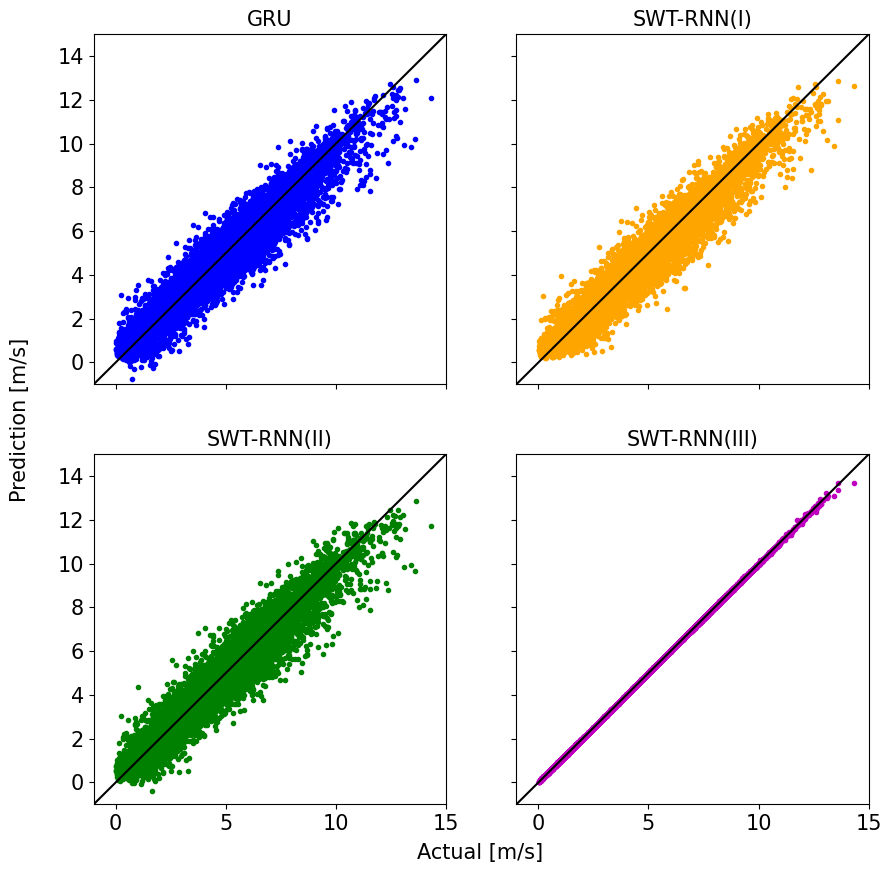

In [643]:
fig, axs = plt.subplots(2, 2, figsize=(10,10), sharex='all', sharey='all')
axs[0, 0].scatter(teste_y.reshape(len(teste_y))[:], model_GRU_simple_predict_y.reshape(len(teste_y))[:], marker='.', color='b')
axs[0, 1].scatter(teste_y.reshape(len(teste_y))[:], predict_y.reshape(len(teste_y))[:], marker='.', color='orange')
axs[1, 0].scatter(teste_y.reshape(len(teste_y))[:], model_WTGRU_WT_original_predict_y.reshape(len(teste_y))[:], marker='.', color='g')
axs[1, 1].scatter(teste_y.reshape(len(teste_y))[:-1],predict_y_model_SWT_all_signal.reshape(len(teste_y)-1)[:], marker='.', color='m')

_ = axs[0,0].plot([-1, 15], [-1, 15], color='black')
_ = axs[0,1].plot([-1, 15], [-1, 15], color='black')
_ = axs[1,0].plot([-1, 15], [-1, 15], color='black')
_ = axs[1,1].plot([-1, 15], [-1, 15], color='black')

axs[0, 0].set_xlim([-1,15])
axs[0, 0].set_ylim([-1,15])
axs[0, 1].set_xlim([-1,15])
axs[0, 1].set_ylim([-1,15])
axs[1, 0].set_xlim([-1,15])
axs[1, 0].set_ylim([-1,15])
axs[1, 1].set_xlim([-1,15])
axs[1, 1].set_ylim([-1,15])
axs[0, 0].tick_params(axis='both', which='major', labelsize=15)
axs[1, 0].tick_params(axis='both', which='major', labelsize=15)
axs[1, 1].tick_params(axis='both', which='major', labelsize=15)

axs[0,0].set_title('GRU', fontsize='15')
axs[0,1].set_title('SWT-RNN(I)', fontsize='15')
axs[1,0].set_title('SWT-RNN(II)', fontsize='15')
axs[1,1].set_title('SWT-RNN(III)', fontsize='15')

plt.text(-5.5, -3.5 , 'Actual [m/s]', fontsize='15')
plt.text(-24, 13 , 'Prediction [m/s]', rotation=90, fontsize='15')


In [ ]:
from scipy.stats import skew
skew(disterro_C)

In [104]:
teste_x_SWT_all_signal.shape

(55833, 128, 6)

In [80]:
128+48

176

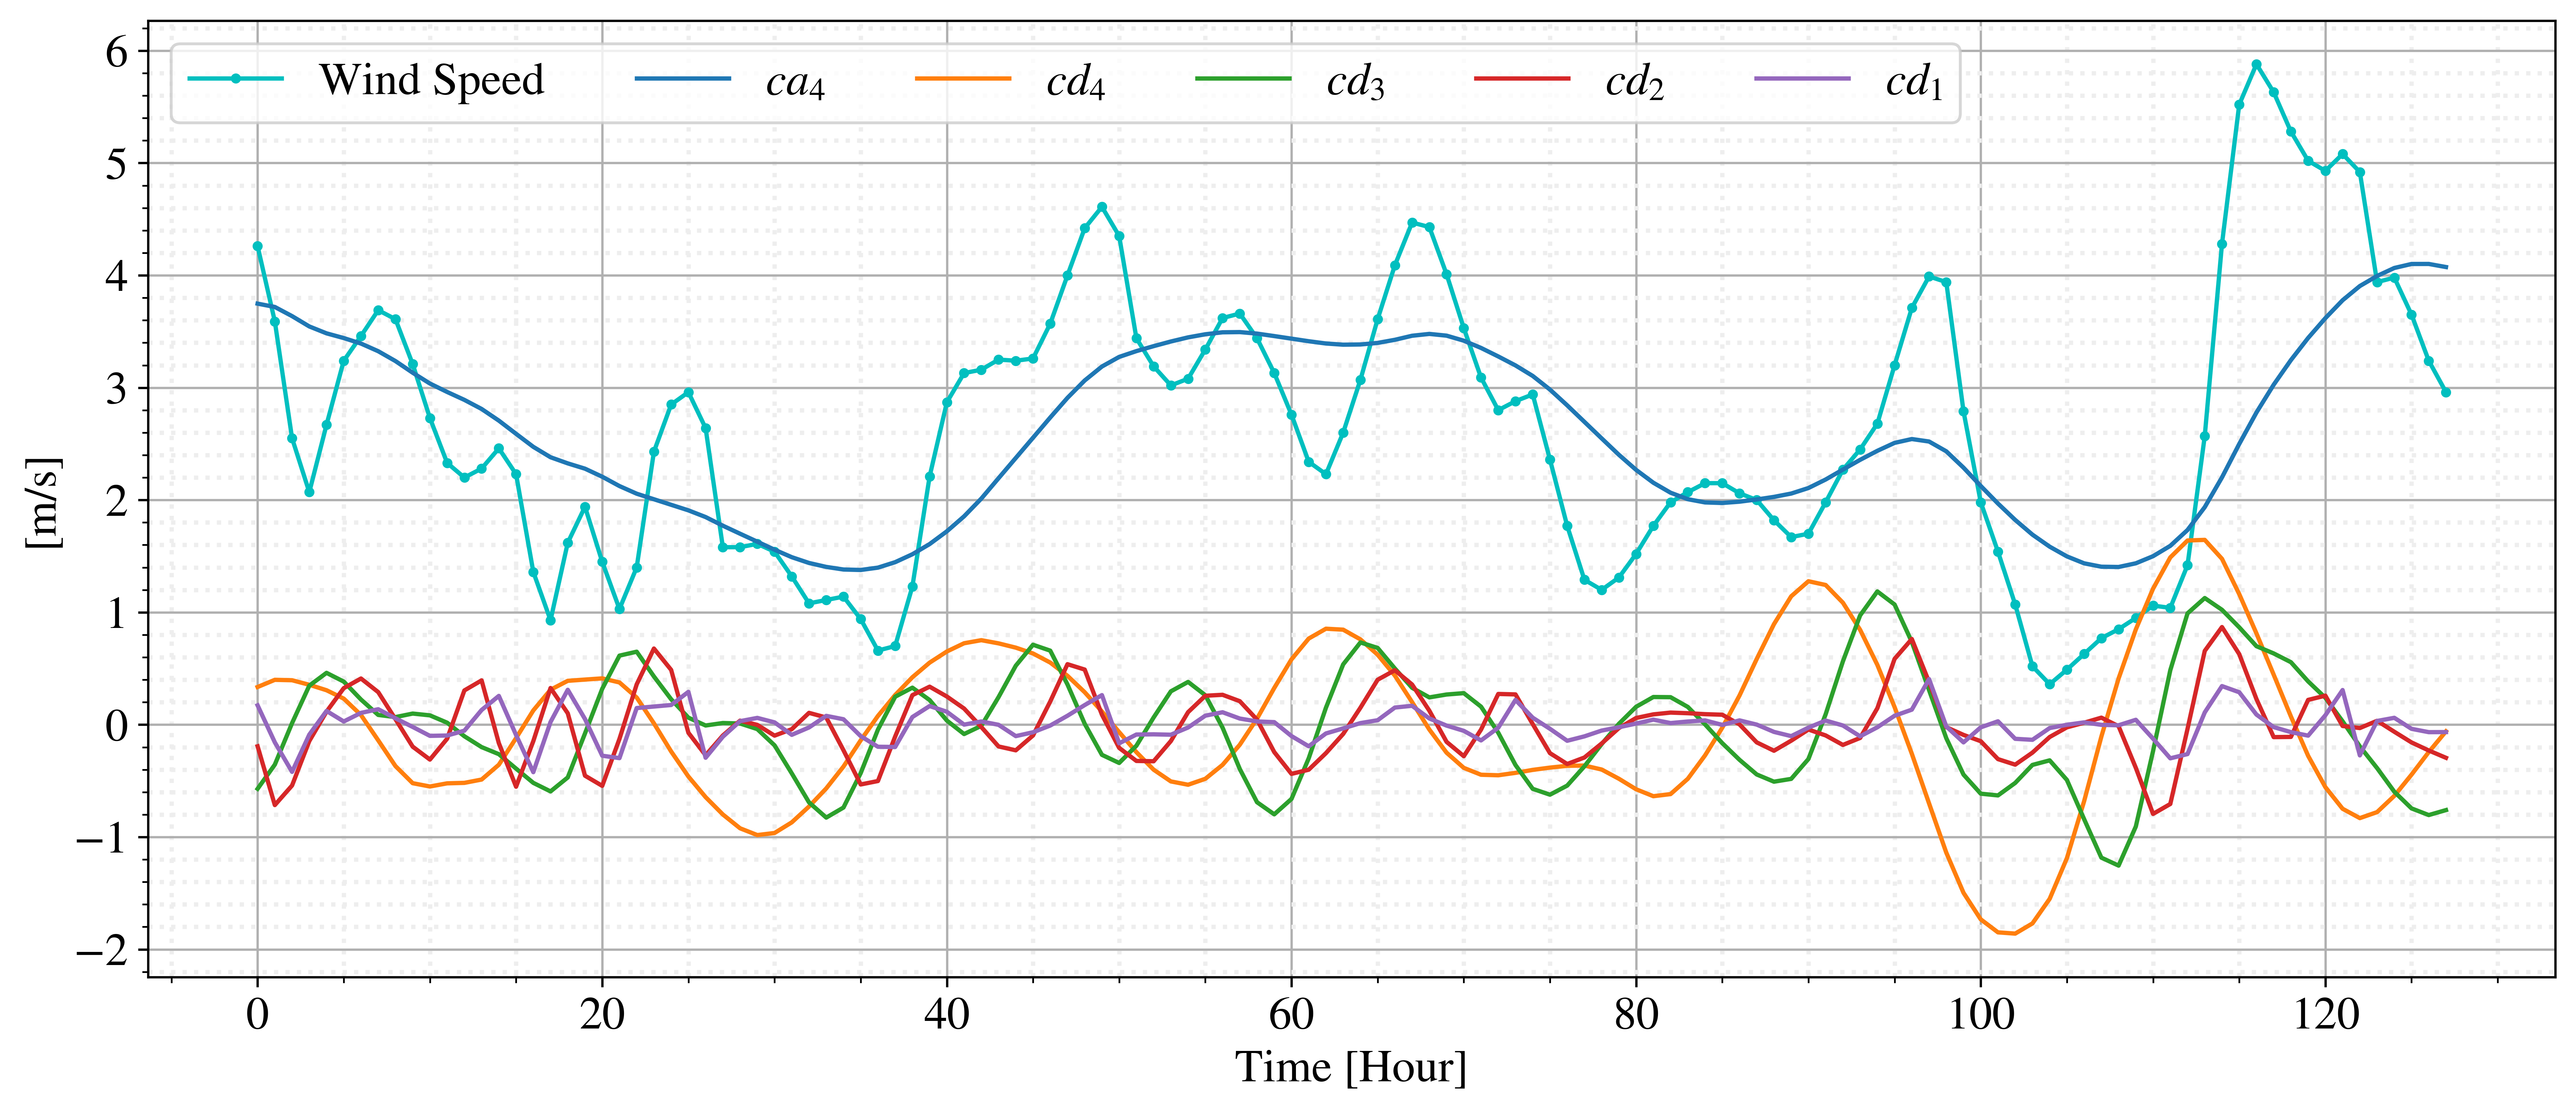

In [130]:
plt.figure(figsize=(15, 6), dpi=600)
plt.plot(range(0,128), teste_x_SWT_all_signal[49,:,0], color='c', marker='.', markersize=5)
plt.plot(range(0,128), teste_x_SWT_all_signal[49,:,1])
plt.plot(range(0,128), teste_x_SWT_all_signal[49,:,2])
plt.plot(range(0,128), teste_x_SWT_all_signal[49,:,3])
plt.plot(range(0,128), teste_x_SWT_all_signal[49,:,4])
plt.plot(range(0,128), teste_x_SWT_all_signal[49,:,5])

import matplotlib
matplotlib.rcParams['mathtext.fontset'] = 'stix'
matplotlib.rcParams['font.family'] = 'STIXGeneral'

plt.legend(['Wind Speed', '$ca_4$', '$cd_4$', '$cd_3$', '$cd_2$', '$cd_1$'], fontsize=16, loc='upper left', ncol=6)
plt.xlabel('Time [Hour]', fontsize=16)
plt.ylabel('[m/s]', fontsize=16)

plt.minorticks_on()
plt.grid(True, which='major')
plt.grid(True, which='minor', color='#EEEEEE', linestyle=':', linewidth=1.5)
plt.tick_params(axis='both', which='major', labelsize=16)


In [106]:
teste_x_with_original[49,:,5]

array([4.26, 3.59, 2.55, 2.07, 2.67, 3.24, 3.46, 3.69, 3.61, 3.21, 2.73,
       2.33, 2.2 , 2.28, 2.46, 2.23, 1.36, 0.93, 1.62, 1.94, 1.45, 1.03,
       1.4 , 2.43, 2.85, 2.96, 2.64, 1.58, 1.58, 1.61, 1.54, 1.32, 1.08,
       1.11, 1.14, 0.94, 0.66, 0.7 , 1.23, 2.21, 2.87, 3.13, 3.16, 3.25,
       3.24, 3.26, 3.57, 4.  , 4.42, 4.61, 4.35, 3.44, 3.19, 3.02, 3.08,
       3.34, 3.62, 3.66, 3.44, 3.13, 2.76, 2.34, 2.23, 2.6 , 3.07, 3.61,
       4.09, 4.47, 4.43, 4.01, 3.53, 3.09, 2.8 , 2.88, 2.94, 2.36, 1.77,
       1.29, 1.2 , 1.31, 1.52, 1.77, 1.98, 2.07, 2.15, 2.15, 2.06, 2.  ,
       1.82, 1.67, 1.7 , 1.98, 2.27, 2.45, 2.68, 3.2 , 3.71, 3.99, 3.94,
       2.79, 1.98, 1.54, 1.07, 0.52, 0.36, 0.49, 0.63, 0.77, 0.85, 0.95,
       1.06, 1.04, 1.42, 2.57, 4.28, 5.52, 5.88, 5.63, 5.28, 5.02, 4.93,
       5.08, 4.92, 3.94, 3.98, 3.65, 3.24, 2.96])

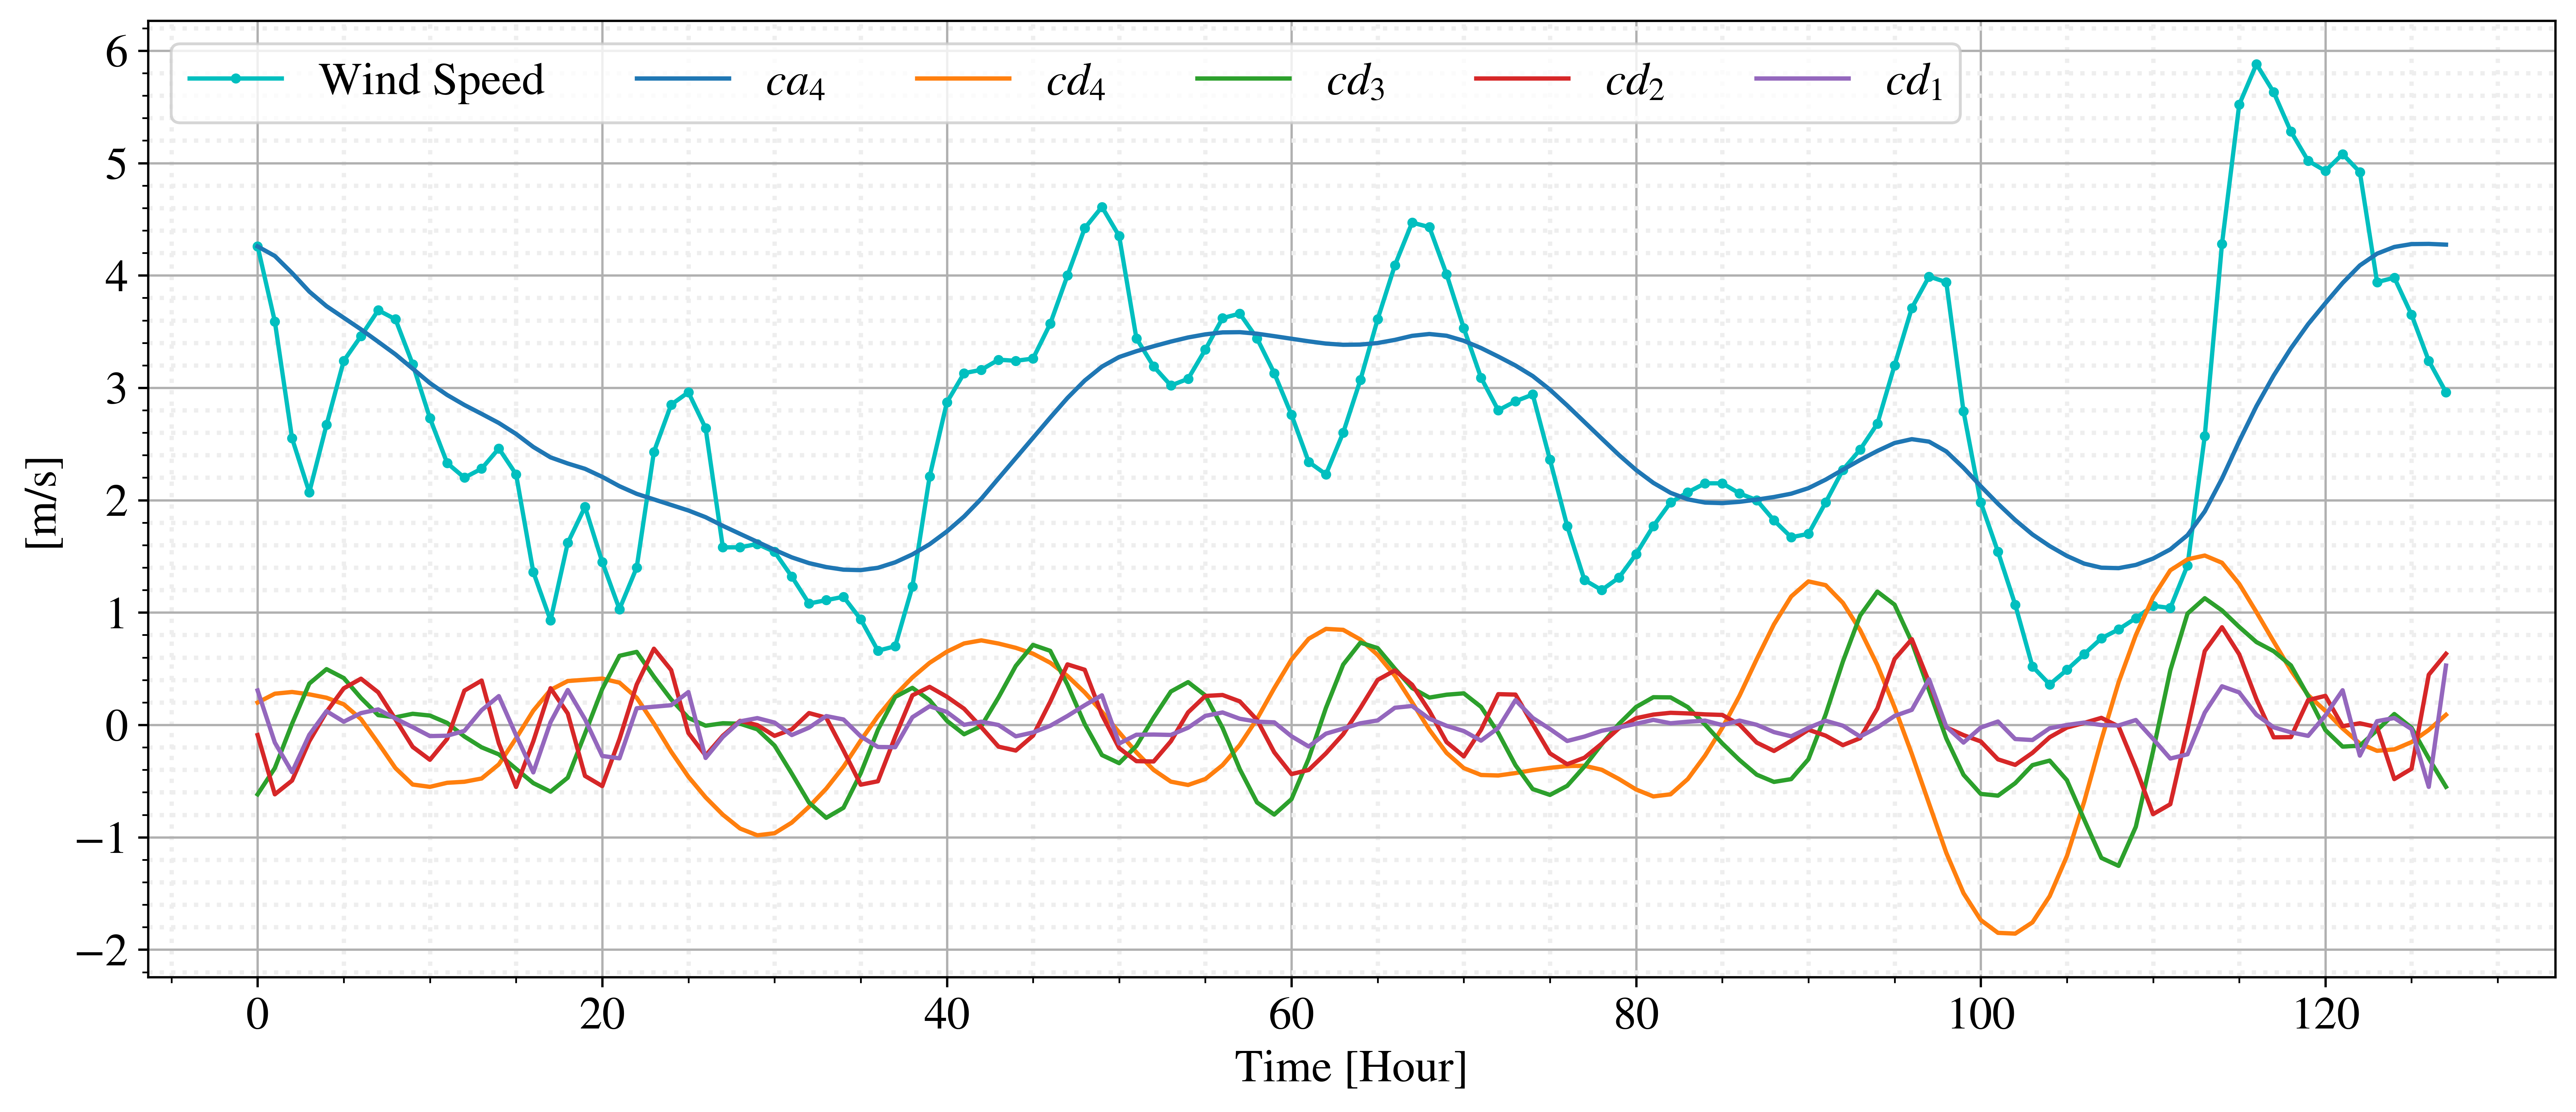

In [131]:
plt.figure(figsize=(15, 6), dpi=600)
plt.plot(range(0,128), teste_x_with_original[49,:,5], color='c', marker='.', markersize=5)
plt.plot(range(0,128), teste_x_with_original[49,:,0])
plt.plot(range(0,128), teste_x_with_original[49,:,1])
plt.plot(range(0,128), teste_x_with_original[49,:,2])
plt.plot(range(0,128), teste_x_with_original[49,:,3])
plt.plot(range(0,128), teste_x_with_original[49,:,4])

plt.legend(['Wind Speed', '$ca_4$', '$cd_4$', '$cd_3$', '$cd_2$', '$cd_1$'], fontsize=16, loc='upper left', ncol=6)
plt.xlabel('Time [Hour]', fontsize=16)
plt.ylabel('[m/s]', fontsize=16)

plt.minorticks_on()
plt.grid(True, which='major')
plt.grid(True, which='minor', color='#EEEEEE', linestyle=':', linewidth=1.5)
plt.tick_params(axis='both', which='major', labelsize=16)